In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import tensorflow as tf
import math
import sklearn.metrics as metrics
import scipy.stats.distributions as dist
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings('ignore')

In [2]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
# cat = Table.read(path2 + 'eagle_cnn12.fits', hdu = 1)
cat = Table.read(path2 + 'EAGLE_fullcat_051021_2.fits', hdu = 1)

In [10]:
cat

<Table length=3164>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ... CNN_OR_PROB  CNN_NOR_PROB
 bytes8       float64            float64       ...   float32      float32   
-------- ------------------ ------------------ ... ----------- -------------
10001175  10.02926735492523  10.02926735492523 ...    0.595818    0.40418205
10003929 10.164414060221883 10.164414060221883 ...   0.7600375    0.23996252
10005161 10.256779038254297 10.256779038254297 ...  0.99298227  0.0070177354
10006223  10.07022061992594  10.07022061992594 ...   0.9122498     0.0877502
10007496   10.1531571311682   10.1531571311682 ...   0.8627839    0.13721612
10009377 10.142718666698723 10.142718666698723 ...   0.9456257   0.054374296
10010671 10.337272124918597 10.337272124918597 ...  0.99933136  0.0006686154
10011808 10.040349964645454 10.040349964645454 ...  0.99709135  0.0029086065
10014008 10.322587015393077 10.322587015393077 ...   0.9999221  7.784671e-05
10016770  10.31486130974732  10.31486130974732 ...   0.9982866   0.001713336
     ...                ...                ... ...         ...           ...
 9986361 10.299280515116717 10.299280515116717 ...  0.99778616   0.002213812
 9987252 10.159674093512534 10.159674093512534 ...    0.921327    0.07867303
 9988502 10.147231691358048 10.147231691358048 ...   0.7040999    0.29590008
 9991034 10.126404283881865 10.126404283881865 ...  0.99702585   0.002974126
 9992055 10.152725874401483 10.152725874401483 ...   0.9865147   0.013485249
 9993167 10.076839398157725 10.076839398157725 ...   0.9957763   0.004223658
 9994243 10.155368356275622 10.155368356275622 ...   0.9692402   0.030759808
 9996951 10.453572271487163 10.453572271487163 ...   0.9999987 1.3284977e-06
 9998415 10.288240850450888 10.288240850450888 ...  0.99999905  9.676892e-07
 9999649 10.159538196191502 10.159538196191502 ...  0.81573033     0.1842697

In [6]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
tab = Table.read(path + 'EAGLE_lambdaR_random.txt',format='ascii', header_start = 0)

In [13]:
lambdaR_edge = np.array(tab.field('LambdaR_edge'))
catid_new = np.array(tab.field('GalaxyID'))
catid_prop = np.array(cat.field('EAGLE_ID'))

# lambdaR_edge = tab.field('LambdaR_edge')
# catid_new = tab.field('GalaxyID')
# catid_prop = cat.field('EAGLE_ID')

In [14]:
tab

<Table length=3638>
GalaxyID  StellarMass  LambdaR_edge LambdaR_rand
 int64      float64      float64      float64   
-------- ------------- ------------ ------------
       1 55155962000.0     0.241227    0.0985533
   13631 52623806000.0     0.266459     0.259365
   21793 40004215000.0     0.431875     0.372872
   23301 42122772000.0     0.405895     0.305203
   24477 26114242600.0     0.351333     0.157265
   26263 36057960000.0     0.231006      0.24175
   27473 27008782300.0    0.0473489    0.0627611
   28850 30976876500.0      0.44673     0.408673
   29817 23492384800.0     0.351731     0.287124
   30902 17284452400.0      0.23676     0.222931
     ...           ...          ...          ...
 2658205 10540431400.0     0.204497     0.104156
 2659779 11242301400.0     0.336945     0.373397
 2721236 49555759000.0     0.119023    0.0794524
 2727611 44654698000.0     0.399451     0.213352
 2748527 17651744800.0     0.175209     0.211096
 2754913 11531512800.0     0.845895     0.689717
 2769526 11588015100.0     0.153367     0.139942
 2780928 13088648200.0     0.125673    0.0912355
 2823427 12003570700.0     0.316216     0.329531
 2838435 16111508500.0     0.697839      0.63362

In [15]:
lambs = []
for i in range(0, np.size(cat)):
  val = catid_prop[i]
  idx = np.where(val == catid_new)[0]
  lamb = lambdaR_edge[idx]
  lambs.append(lamb[0])


In [ ]:
np.size(lambs)

3164

In [11]:
hidad = cat.field('EAGLE_ID')

guess_2 = np.zeros((np.shape(hidad)))
guess_3 = []
for i in range(0, np.size(hidad)):
  guess = int(int(hidad[i]))
  guess_3.append(guess)
  # print(guess)
  guess_2[i] = int(guess)

guess_3 = np.array(guess_3)


In [12]:
cat['EAGLE_ID'] = guess_3

In [ ]:
hidad[0]

'10001175'

In [ ]:
path ='/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
lagos = np.load(path + 'lagoslambdar.npy')
id12 = np.load(path + 'lagosids.npy')

In [ ]:
id12[0]

13935854

In [ ]:
vals = []
for i in range(0, np.size(cat)):
  iduse = guess_3[i]
  # print(iduse)
  idx = np.where(iduse == id12)
  if np.size(idx) < 1:
    vals.append(np.NaN)
  else:
    # print('found')
    vals.append(lagos[idx][0])

In [ ]:
vals = np.array(vals)
cat['LAMBDAR_LAGOS'] = vals

In [ ]:
vals

array([     nan,      nan, 0.231348, ...,      nan,      nan,      nan])

In [ ]:
cat[0:5]

<Table length=5>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ... CNN_NOR_PROB LAMBDAR_LAGOS
 bytes8       float64            float64       ...   float32       float64   
-------- ------------------ ------------------ ... ------------ -------------
10001175  10.02926735492523  10.02926735492523 ...   0.40418205           nan
10003929 10.164414060221883 10.164414060221883 ...   0.23996252           nan
10005161 10.256779038254297 10.256779038254297 ... 0.0070177354      0.231348
10006223  10.07022061992594  10.07022061992594 ...    0.0877502           nan
10007496   10.1531571311682   10.1531571311682 ...   0.13721612           nan

In [ ]:
# path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
# # eagle_class1 = np.array(cat.field('CNN_CLASS'))
# # eagle_class2 = np.load(path + 'eagle_class_300921_1.npy')

# eagle_3map16p = np.load(path + 'eagle_3map16p.npy')
# eagle_3map75n = np.load(path + 'eagle_3map75n.npy')

# # cat['CNN_CLASS1'] = eagle_3map16p
# # cat['CNN_CLASS2'] = eagle_3map75n

In [ ]:
cat_spax = cat[np.where(cat.field('NUM_SPAXEL') < 50)]
# cat_spax = cat_spax[np.where(cat_spax.field('NUM_SPAXEL') < 100)]


In [ ]:
class_44 = cat_spax.field("CNN_CLASS")
spaxels = cat_spax.field('NUM_SPAXEL')

In [ ]:
ids_low = cat_spax[0:20].field('EAGLE_ID')

In [ ]:
lowspax = []
for i in range(20):
  val = int(ids_low[i])
  lowspax.append(val)
# lowspax = np.array(lowspax)

In [ ]:
lowspax

array([10001175, 10003929, 10006223, 10007496, 10009377, 10011808,
       10019142, 10023058, 10029006, 10030066, 10030979, 10031996,
       10034217, 10039759, 10042583, 10045343, 10046237, 10047593,
       10049926, 10051253])

In [ ]:
cat['LAMB'] = lambs

In [ ]:
cat = cat_spax

# Create Full catalogue



In [ ]:
path ='/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
eclass = np.load(path + 'eagle_2map16p50.npy')
ORp = np.load(path + 'eagle_OR_0510_2.npy')
NORp = np.load(path + 'eagle_NOR_0510_2.npy')
ID = np.load(path + 'EAGLE_ID_0510.npy')
numsp = np.load(path + 'EAGLE_numsp_0510.npy')
r50 = np.load(path + 'EAGLE_R50_0510.npy')
msol = np.load(path + 'EAGLE_M_SOL_0510.npy')
msol50 = np.load(path + 'EAGLE_M_SOL50_0510.npy')
z = np.load(path + 'EAGLE_Z_0510.npy')
ang = np.load(path + 'EAGLE_ANG_0510.npy')
radhi = np.load(path + 'EAGLE_radhi_0510.npy')
eclass_3map = np.load(path + 'eagle_3map16p45.npy')

lambdar90 = np.load(path + 'EAGLE_lambdar90_0510.npy')
ellip90 = np.load(path + 'EAGLE_ellip90_0510.npy')

lambdar60 = np.load(path + 'EAGLE_lambdar60_0510.npy')
ellip60 = np.load(path + 'EAGLE_ellip60_0510.npy')

vmin = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vmin_051021.npy')
vmax = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vmax_051021.npy')
smin = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_smin_051021.npy')
smax = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_smax_051021.npy')

In [ ]:
cat = Table([ID, msol, msol50, r50, z, ang, numsp, vmin, vmax, smin, smax, lambdar60, ellip60,lambdar90, ellip90, radhi, eclass_3map, ORp, NORp], 
          names=('EAGLE_ID','LOG_M_SOL', 'LOG_M_SOL50', 'R_50' , 'REDSHIFT','ANGULAR_SCALE','NUM_SPAXEL', 'VMIN' , 'VMAX' , 'SMIN', 'SMAX', 'LAMBDA_R60', 'ELLIP60', 'LAMBDA_R90', 'ELLIP_R90', 'RADHI', 'CNN_CLASS', 'CNN_OR_PROB', 'CNN_NOR_PROB'))


In [ ]:
# cat2['VMAX'] = vmax
# cat2['VMIN'] = vmin
# cat2['SMIN'] = smin
# cat2['SMAX'] = smax

In [ ]:
cat[100:120]

<Table length=20>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ... CNN_OR_PROB   CNN_NOR_PROB
  str8        float64            float64       ...   float32       float32   
-------- ------------------ ------------------ ... ------------ -------------
10153844 10.147692462386022 10.147692462386022 ...    0.4669495    0.53305054
10155840 10.153202202139699 10.153202202139699 ...   0.99389887   0.006101082
10158008 10.150663294423186 10.150663294423186 ...    0.3718391     0.6281609
10159084 10.111149236096415 10.111149236096415 ...    0.6444658    0.35553417
10161160 10.407530721385571 10.407530721385571 ...    0.9999901  9.883651e-06
10162089 10.097865628234707 10.097865628234707 ...   0.24565423     0.7543458
10162863 10.004694324160528 10.004694324160528 ...   0.26600844    0.73399156
10164038 10.818021436678263 10.818021436678263 ...    0.9997722 0.00022779035
10166064  10.06809343998609  10.06809343998609 ...    0.3079632    0.69203675
10167709 10.178596039216975 10.178596039216975 ... 0.0026099784    0.99739003
10168969 10.193492874217192 10.193492874217192 ...    0.5602497     0.4397503
10171253 10.112707728848035 10.112707728848035 ...    0.2762332     0.7237668
10172252 10.223646113912006 10.223646113912006 ...   0.67922986    0.32077014
10173306 10.095022583936348 10.095022583936348 ...   0.37592927    0.62407076
10174637  10.29981791842962  10.29981791842962 ...    0.9976866  0.0023133666
10176511 10.073973750336888 10.073973750336888 ...   0.49900693     0.5009931
10177604 10.087260889326835 10.087260889326835 ...   0.21773362     0.7822664
10178758  10.27020303595348  10.27020303595348 ...   0.93145883   0.068541124
 1017876 10.164664519771614 10.164664519771614 ...    0.6640881     0.3359119
10180875 10.097108728488829 10.097108728488829 ...    0.7147138    0.28528625

In [ ]:
cat

<Table length=3164>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ... CNN_OR_PROB CNN_NOR_PROB
  str8        float64            float64       ...   float32     float32   
-------- ------------------ ------------------ ... ----------- ------------
10001175  10.02926735492523  10.02926735492523 ...  0.52365804    0.4763419
10003929 10.164414060221883 10.164414060221883 ...   0.7479037   0.25209624
10005161 10.256779038254297 10.256779038254297 ...  0.98674464  0.013255314
10006223  10.07022061992594  10.07022061992594 ...  0.24019146   0.75980854
10007496   10.1531571311682   10.1531571311682 ...    0.329022     0.670978
10009377 10.142718666698723 10.142718666698723 ...  0.77745223   0.22254777
10010671 10.337272124918597 10.337272124918597 ...   0.9802694    0.0197306
10011808 10.040349964645454 10.040349964645454 ...   0.4883027    0.5116973
10014008 10.322587015393077 10.322587015393077 ...   0.9000248   0.09997526
10016770  10.31486130974732  10.31486130974732 ...   0.9965933 0.0034066904
     ...                ...                ... ...         ...          ...
 9986361 10.299280515116717 10.299280515116717 ...   0.7909448   0.20905516
 9987252 10.159674093512534 10.159674093512534 ...  0.15018761    0.8498124
 9988502 10.147231691358048 10.147231691358048 ...  0.45230645    0.5476936
 9991034 10.126404283881865 10.126404283881865 ...  0.52835476   0.47164524
 9992055 10.152725874401483 10.152725874401483 ...  0.44851542    0.5514846
 9993167 10.076839398157725 10.076839398157725 ...  0.54407954   0.45592052
 9994243 10.155368356275622 10.155368356275622 ...  0.31214756   0.68785244
 9996951 10.453572271487163 10.453572271487163 ...  0.99723405 0.0027659805
 9998415 10.288240850450888 10.288240850450888 ...   0.9955727 0.0044273008
 9999649 10.159538196191502 10.159538196191502 ...  0.55126715    0.4487329

In [ ]:
r = cat.write(path2 + 'EAGLE_fullcat_051021_2.fits', format = 'fits')

In [ ]:
cat2 = Table.read(path2 + 'EAGLE_fullcat3_140921.fits', hdu = 1)

In [ ]:
cat

<Table length=1438>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ...  CNN_NOR_PROB CNN_CLASS_2
  str8        float64            float64       ...    float32       int64   
-------- ------------------ ------------------ ... ------------- -----------
 1008742   10.5106211404498   10.5106211404498 ... 0.00018499102           1
10161160 10.407530721385571 10.407530721385571 ...  9.883651e-06           1
10164038 10.818021436678263 10.818021436678263 ... 0.00022779035           1
10182121 10.433742710067799 10.433742710067799 ... 0.00029516505           1
10222239 10.349223284877683 10.349223284877683 ...     0.5208576           2
10255926  10.33582054661208  10.33582054661208 ...  0.0035935943           1
10279008 10.548034798180801 10.548034798180801 ...  4.222003e-06           1
10349358 10.434983569007013 10.434983569007013 ... 0.00018724214           1
10578108 10.659288642750528 10.659288642750528 ... 0.00057429814           1
10580487  10.85172209880691  10.85172209880691 ... 8.1974315e-07           1
     ...                ...                ... ...           ...         ...
 9835509 10.315602562640333 10.315602562640333 ... 4.9631177e-05           1
 9845892 10.434821730323499 10.434821730323499 ... 0.00066720636           1
 9878130 10.463166517441488 10.463166517441488 ... 0.00019665639           1
 9883163 10.343898552084138 10.343898552084138 ...  0.0022672978           1
 9924169 10.467152430053858 10.467152430053858 ... 2.3282767e-06           1
 9925265 10.618416400122511 10.618416400122511 ... 1.6190183e-05           1
 9932078 10.326144737502515 10.326144737502515 ...  0.0038648956           1
 9934326 10.509291060975372 10.509291060975372 ... 1.3245382e-05           1
 9954915 10.318955915357451 10.318955915357451 ...  0.0009927838           1
 9996951 10.453572271487163 10.453572271487163 ...  0.0027659805           1

# Separate Catalogues into constituents

In [3]:
eagle_class = cat.field('CNN_CLASS')
# # eagle_pclass = cat.field('CNN_CLASS1')
# eagle_nclass = cat.field('CNN_CLASS_2')
eagle_OR = cat.field('CNN_OR_PROB')
eagle_NOR = cat.field('CNN_NOR_PROB')
eagle_ID = cat.field('EAGLE_ID')
eagle_lmsol = cat.field('LOG_M_SOL')
eagle_lmsol50 = cat.field('LOG_M_SOL50')
eagle_r50 = cat.field('R_50')
eagle_z = cat.field('REDSHIFT')
eagle_numspaxel = cat.field('NUM_SPAXEL')
eagle_ellip90 = cat.field('ELLIP_R90')
eagle_lambdar90 = cat.field('LAMBDA_R90')
eagle_ellip60 = cat.field('ELLIP60')
eagle_lambdar60 = cat.field('LAMBDA_R60')
eagle_minvel = cat.field('VMIN')
eagle_maxvel = cat.field('VMAX')
eagle_minsig = cat.field('SMIN')
eagle_maxsig = cat.field('SMAX')
eagle_radhi = cat.field('RADHI')
eagle_ang = cat.field('ANGULAR_SCALE')
# eagle_lagos = cat.field('LAMBDAR_LAGOS')


(array([ 145.,    0.,    0.,    0.,    0., 2699.,    0.,    0.,    0.,
         320.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

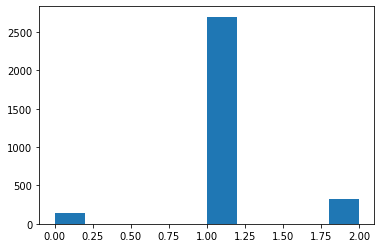

In [ ]:
plt.hist(eagle_class)

In [ ]:
import scipy.stats.distributions as dist

n = 1615

k = 1475


prop = k/n

c = 0.68

p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

In [ ]:
(p_upper - prop)

0.006461513698873933

In [4]:
labels_test = cat.field('CNN_CLASS')
OR_loc = np.where(labels_test == 1)
cat_OR  = cat[OR_loc]

NOR_loc = np.where(labels_test == 0)
cat_NOR  = cat[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2)
cat_UNKNOWN  = cat[UNKNOWN_loc]

In [5]:
eagle_class_OR = cat_OR.field('CNN_CLASS')
eagle_OR_OR = cat_OR.field('CNN_OR_PROB')
eagle_NOR_OR = cat_OR.field('CNN_NOR_PROB')
eagle_ID_OR = cat_OR.field('EAGLE_ID')
eagle_m_sol_OR = cat_OR.field('LOG_M_SOL')
# eagle_m_sol50_OR = cat_OR.field('LOG_M_SOL50')
eagle_r50_OR = cat_OR.field('R_50')
# eagle_r50_proj_OR = cat_OR.field('R50_PROJ')
# eagle_re_r_OR = cat_OR.field('RE_RBAND')
eagle_z_OR = cat_OR.field('REDSHIFT')
# eagle_ellip60_OR = cat_OR.field('ELLIP_i60')
# eagle_lambdar60_OR = cat_OR.field('LAMBDA_i60')
eagle_spaxels_OR = cat_OR.field('NUM_SPAXEL')
eagle_ellip90_OR = cat_OR.field('ELLIP_R90')
eagle_lambdar90_OR = cat_OR.field('LAMBDA_R90')
# eagle_pclass_OR = cat_OR.field('CNN_CLASS1')
# eagle_nclass_OR = cat_OR.field('CNN_CLASS_2')

eagle_class_NOR = cat_NOR.field('CNN_CLASS')
eagle_OR_NOR = cat_NOR.field('CNN_OR_PROB')
eagle_NOR_NOR = cat_NOR.field('CNN_NOR_PROB')
eagle_ID_NOR = cat_NOR.field('EAGLE_ID')
eagle_m_sol_NOR = cat_NOR.field('LOG_M_SOL')
eagle_m_sol50_NOR = cat_NOR.field('LOG_M_SOL50')
eagle_r50_NOR = cat_NOR.field('R_50')
# eagle_r50_proj_NOR = cat_NOR.field('R50_PROJ')
# eagle_re_r_NOR = cat_NOR.field('RE_RBAND')
eagle_z_NOR = cat_NOR.field('REDSHIFT')
# eagle_ellip60_NOR = cat_NOR.field('ELLIPi60')
# eagle_lambdar60_NOR = cat_NOR.field('LAMBDA_Ri60')
eagle_spaxels_NOR = cat_NOR.field('NUM_SPAXEL')
eagle_ellip90_NOR = cat_NOR.field('ELLIP_R90')
eagle_lambdar90_NOR = cat_NOR.field('LAMBDA_R90')
# eagle_pclass_NOR = cat_NOR.field('CNN_CLASS1')
# eagle_nclass_NOR = cat_NOR.field('CNN_CLASS_2')


eagle_class_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS')
eagle_OR_UNKNOWN = cat_UNKNOWN.field('CNN_OR_PROB')
eagle_NOR_UNKNOWN = cat_UNKNOWN.field('CNN_NOR_PROB')
eagle_ID_UNKNOWN = cat_UNKNOWN.field('EAGLE_ID')
eagle_m_sol_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL')
eagle_m_sol50_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL50')
eagle_r50_UNKNOWN = cat_UNKNOWN.field('R_50')
# eagle_r50_proj_UNKNOWN = cat_UNKNOWN.field('R50_PROJ')
# eagle_re_r_UNKNOWN = cat_UNKNOWN.field('RE_RBAND')
eagle_z_UNKNOWN = cat_UNKNOWN.field('REDSHIFT')
# eagle_ellip60_UNKNOWN = cat_UNKNOWN.field('ELLIPi60')
# eagle_lambdar60_UNKNOWN = cat_UNKNOWN.field('LAMBDA_Ri60')
eagle_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL')
eagle_ellip90_UNKNOWN = cat.field('ELLIP_R90')
eagle_lambdar90_UNKNOWN = cat.field('LAMBDA_R90')
# eagle_pclass_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS1')
# eagle_nclass_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS_2')

In [18]:
lambs = np.array(lambs)

In [23]:
cattas = cat_NOR[np.where(lambs > 0.4)]

IndexError: ignored

In [22]:
cattas

<Column name='CNN_NOR_PROB' dtype='float32' length=2070>
 0.0006686154
 0.0029086065
 7.784671e-05
  0.001713336
 0.0024721164
0.00065071695
 0.0003182795
 0.0041887853
  0.005695048
  0.008325571
   0.08034181
 0.0031382674
          ...
 0.0012882701
  0.005114861
0.00050601736
  0.013498979
 0.0076546073
  0.062102363
  0.002213812
  0.002974126
  0.013485249
  0.004223658
  0.030759808
1.3284977e-06

# Creating FITS Table

In [ ]:
# file1 = 'SimSpin_EAGLE_observations_snap28_RefL0100N1504.txt'
# cat3 = Table.read(path2 + file1, format  = 'ascii')

# lambdar_i90 = cat3['LambdaR_i90']
# # lambdar_i60 = cat3['LambdaR_i60']
# ellip_i90 = cat3['Ellip_i90']
# # ellip_i60 = cat3['Ellip_i60']
# # pixel_sizes = cat3['PixelSize']
# # lmstar60 = cat3['StellarMass_ss_i60']
# # numparticles60 = cat3['NumberOfParticles_ss_i60']
# # catids = cat3['GalaxyID']


In [ ]:
# # lambda_i60_vals = []
# lambda_i90_vals = []
# # ellip_i60_vals = []
# ellip_i90_vals = []
# # pixel_size = []
# # num_particlesi60_vals = []
# # # catid_test = []
# # lmstari60_vals = []

# for i in range(0, np.size(id_vals)):
#   id = id_vals[i]
#   a = np.where(id == idin)
#   if np.size(a) < 1:
#     idx = np.NaN
#   else:
#     idx = a[0][0]
#     # catid = catids[idx]
#     # catid_test.append(catid)

#   if math.isnan(idx) == True:
#     # lambda_i60_vals.append(np.NaN)
#     # ellip_i60_vals.append(np.NaN)
#     # pixel_size.append(np.NaN)
#     # num_particlesi60_vals.append(np.NaN)
#     # lmstari60_vals.append(np.NaN)
#     ellip_i90_vals.append(np.NaN)
#     lambda_i90_vals.append(np.NaN)

#   else:
#     # lambda_60 = lambdar_i60[idx]
#     # ellip_60 = ellip_i60[idx]
#     # pixel = pixel_sizes[idx]
#     # lmstar = lmstar60[idx]
#     # num_p = numparticles60[idx]
#     ellip_i90_vals.append(ellip_i90[idx])
#     lambda_i90_vals.append(lambdar_i90[idx])

#     # lambda_i60_vals.append(lambda_60)
#     # ellip_i60_vals.append(ellip_60)
#     # pixel_size.append(pixel)
#     # num_particlesi60_vals.append(num_p)
#     # lmstari60_vals.append(lmstar)

In [ ]:
# cat['LAMBDA_i90'] = lambda_i90_vals
# cat['ELLIP_i90'] = ellip_i90_vals

In [ ]:
# a1 = cat3.field('StellarMass_50kpc')
# a2 = cat3.field('NumberOfParticles_50kpc')
# massp1 = np.mean(a1/a2)
# print('Avg mass per pixel (50kpc):  ' + str(massp1))

# b1 = cat3.field('StellarMass_ss_i90')
# b2 = cat3.field('NumberOfParticles_ss_i90')
# massp1 = np.mean(b1/b2)
# print('Avg mass per pixel (i90):  ' + str(massp1))

# b1 = cat3.field('StellarMass_ss_i60')
# b2 = cat3.field('NumberOfParticles_ss_i60')
# massp1 = np.mean(b1/b2)
# print('Avg mass per pixel (i60):  ' + str(massp1))

# b1 = cat3.field('StellarMass_subfind')
# b2 = cat3.field('NumberOfParticles_subfind')
# massp1 = np.mean(b1/b2)
# print('Avg mass per pixel (subfind):  ' + str(massp1))


# Analysis of catalogue

In [ ]:
cat = cat[np.where(cat.field('LOG_M_SOL') > 11)]
eagleoldid = cat.field('EAGLE_ID')
class1 = cat.field('CNN_CLASS')
cat = cat[np.where(class1 == 0)]

eagleoldid = np.array(eagleoldid)

In [ ]:
cat = cat[np.where(cat.field('LAMBDA_R90') > 0.37)]
# eagleoldid = cat.field('EAGLE_ID')
# class1 = cat.field('CNN_CLASS')
# cat = cat[np.where(class1 == 0)]

# eagleoldid = np.array(eagleoldid)

In [ ]:
cat

<Table length=3>
EAGLE_ID     LOG_M_SOL         LOG_M_SOL50     ...  CNN_OR_PROB   CNN_NOR_PROB
 int32        float64            float64       ...    float32       float32   
-------- ------------------ ------------------ ... ------------- -------------
17213205  10.95768857918689 10.935832995497359 ...           1.0 1.1026455e-09
20069906 11.453192738908456 11.331944378066396 ... 3.9642855e-05     0.9999603
 8225948 10.925701270843577   10.9123407669561 ...     0.9987597  0.0012403039

# Analysis of Old catalogue

In [ ]:
labels_test = cat.field('CNN_CLASS')
OR_loc = np.where(labels_test == 1)
cat_OR  = cat[OR_loc]

NOR_loc = np.where(labels_test == 0)
cat_NOR  = cat[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2)
cat_UNKNOWN  = cat[UNKNOWN_loc]

In [ ]:
eagle_class_OR = cat_OR.field('CNN_CLASS')
eagle_OR_OR = cat_OR.field('CNN_OR_PROB')
eagle_NOR_OR = cat_OR.field('CNN_NOR_PROB')
eagle_ID_OR = cat_OR.field('EAGLE_ID')
eagle_m_sol_OR = cat_OR.field('LOG_M_SOL')
eagle_m_sol50_OR = cat_OR.field('LOG_M_SOL50')
eagle_r50_OR = cat_OR.field('R_50')
eagle_r50_proj_OR = cat_OR.field('R50_PROJ')
eagle_re_r_OR = cat_OR.field('RE_RBAND')
eagle_z_OR = cat_OR.field('REDSHIFT')
eagle_ellip60_OR = cat_OR.field('ELLIP_i60')
eagle_lambdar60_OR = cat_OR.field('LAMBDA_i60')
eagle_spaxels_OR = cat_OR.field('NUM_SPAXEL')
eagle_ellip90_OR = cat.field('ELLIP_i90')
eagle_lambdar90_OR = cat.field('LAMBDA_i90')

eagle_class_NOR = cat_NOR.field('CNN_CLASS')
eagle_OR_NOR = cat_NOR.field('CNN_OR_PROB')
eagle_NOR_NOR = cat_NOR.field('CNN_NOR_PROB')
eagle_ID_NOR = cat_NOR.field('EAGLE_ID')
eagle_m_sol_NOR = cat_NOR.field('LOG_M_SOL')
eagle_m_sol50_NOR = cat_NOR.field('LOG_M_SOL50')
eagle_r50_NOR = cat_NOR.field('R_50')
eagle_r50_proj_NOR = cat_NOR.field('R50_PROJ')
eagle_re_r_NOR = cat_NOR.field('RE_RBAND')
eagle_z_NOR = cat_NOR.field('REDSHIFT')
eagle_ellip60_NOR = cat_NOR.field('ELLIP_i60')
eagle_lambdar60_NOR = cat_NOR.field('LAMBDA_i60')
eagle_spaxels_NOR = cat_NOR.field('NUM_SPAXEL')
eagle_ellip90_NOR = cat.field('ELLIP_i90')
eagle_lambdar90_NOR = cat.field('LAMBDA_i90')

eagle_class_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS')
eagle_OR_UNKNOWN = cat_UNKNOWN.field('CNN_OR_PROB')
eagle_NOR_UNKNOWN = cat_UNKNOWN.field('CNN_NOR_PROB')
eagle_ID_UNKNOWN = cat_UNKNOWN.field('EAGLE_ID')
eagle_m_sol_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL')
eagle_m_sol50_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL50')
eagle_r50_UNKNOWN = cat_UNKNOWN.field('R_50')
eagle_r50_proj_UNKNOWN = cat_UNKNOWN.field('R50_PROJ')
eagle_re_r_UNKNOWN = cat_UNKNOWN.field('RE_RBAND')
eagle_z_UNKNOWN = cat_UNKNOWN.field('REDSHIFT')
eagle_ellip60_UNKNOWN = cat_UNKNOWN.field('ELLIP_i60')
eagle_lambdar60_UNKNOWN = cat_UNKNOWN.field('LAMBDA_i60')
eagle_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL')
eagle_ellip90_UNKNOWN = cat.field('ELLIP_i90')
eagle_lambdar90_UNKNOWN = cat.field('LAMBDA_i90')

# Plotting Figures

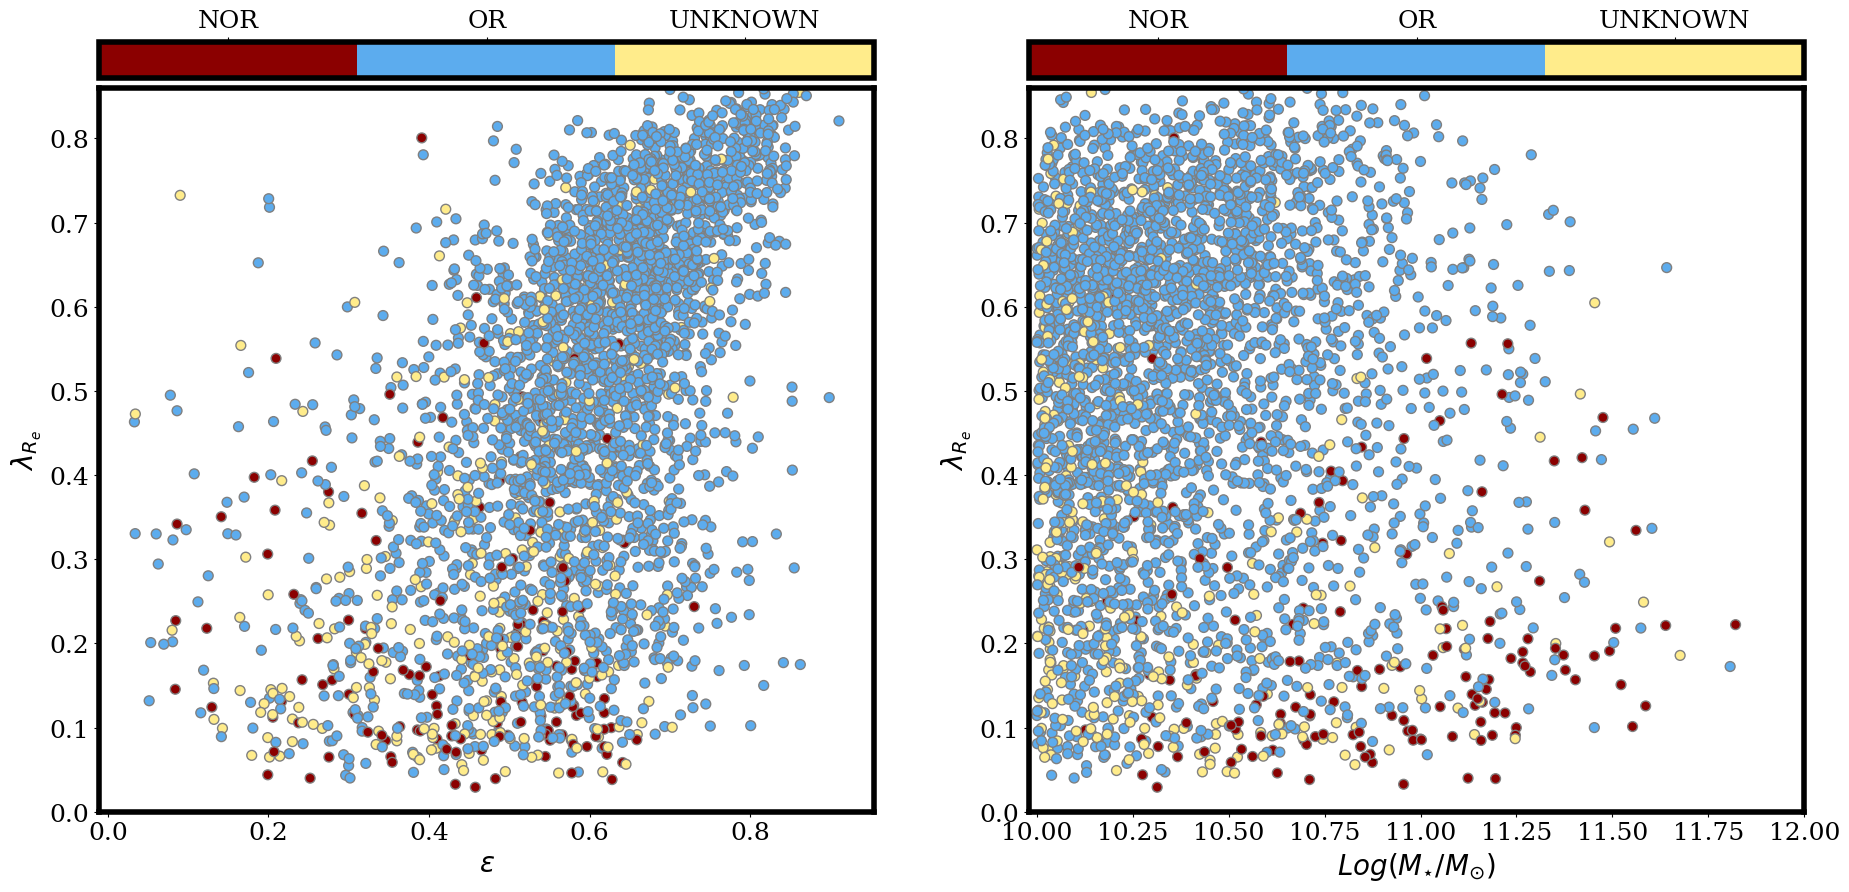

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib
import matplotlib as mpl
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

# Let's design a dummy land use field

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["NOR","OR","UNKNOWN"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
# print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots(1,2,  figsize = (22,10))

ax[1].set_xlabel(r'$Log(M_{\star}/M_{\odot})}$', fontsize = 20, fontweight = 'bold')
ax[1].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')
ax[1].set_xlim(9.98, 12)
ax[1].set_ylim(0,0.86)

im = ax[1].scatter(eagle_lmsol, lambs, c = eagle_class, edgecolors='grey', cmap = cm, norm = norm, s = 50)
# im = ax.scatter(A, cmap=cm, norm=norm)

divider = make_axes_locatable(ax[1])
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)


ax[0].set_xlabel(r'$\varepsilon$', fontsize = 20, fontweight = 'bold')
ax[0].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')
ax[0].set_ylim(0,0.86)

im = ax[0].scatter(eagle_ellip90, lambs, c = eagle_class, edgecolors='grey', cmap = cm, norm = norm, s = 50)

divider = make_axes_locatable(ax[0])
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)
# ax.yaxis.set_ticks(ticks = ticks)
# ax.yaxis.set_ticks_position('top')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_formatter('{x:.0f}')

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))


# fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# fig.savefig("example_landuse.png")
plt.show()

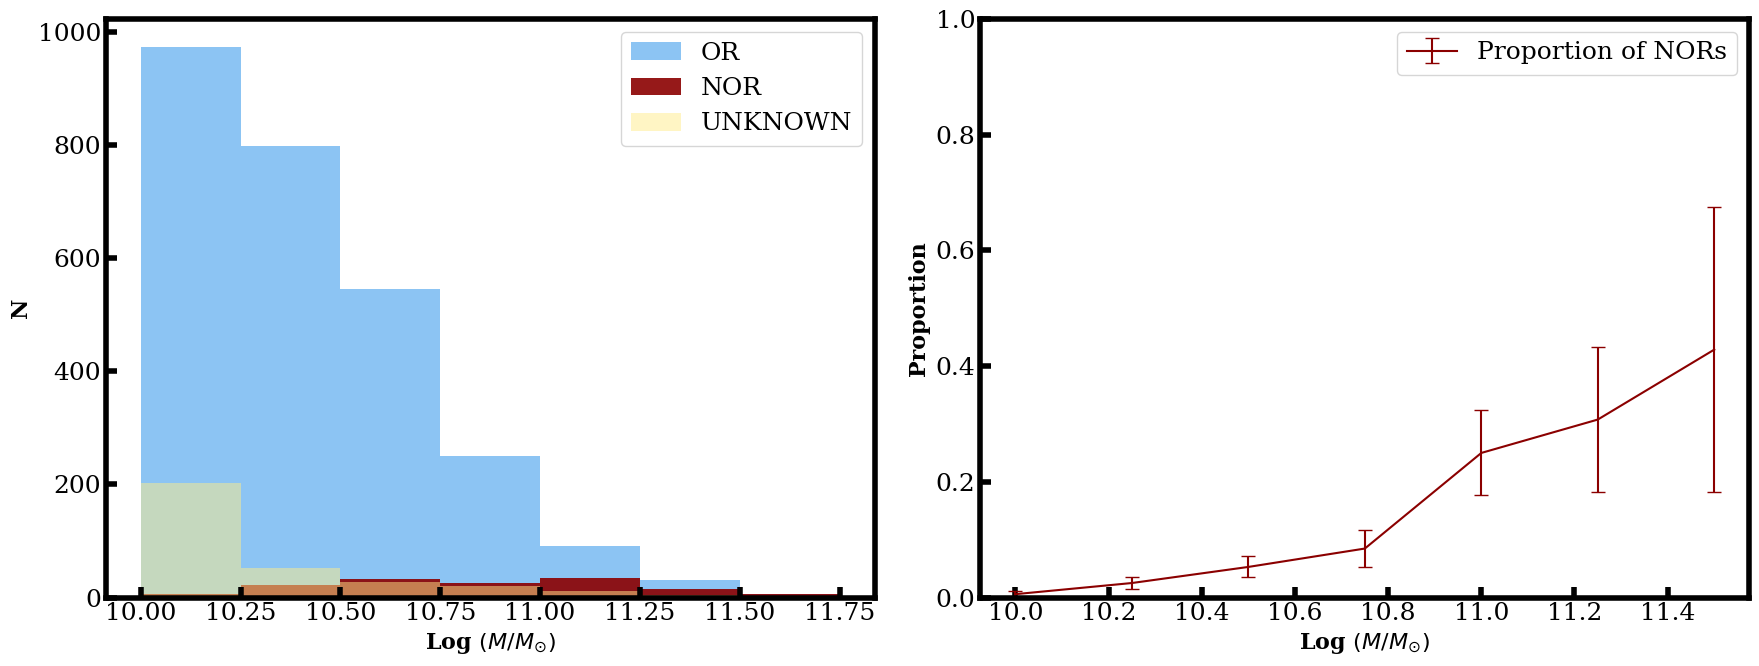

In [ ]:
# sns.set_theme()
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

fig, axs = plt.subplots(1,2, figsize = (18,7))
bins = np.arange(10, 12, 0.25)
counts, bins, bars = axs[0].hist(eagle_m_sol_OR, alpha = 0.7, bins = bins, label = 'OR', color = "#5CACEE")
counts1, bins1, bars1 = axs[0].hist(eagle_m_sol_NOR, alpha = 0.9, bins = bins, label = 'NOR', color = "#8B0000")
counts2, bins2, bars2 = axs[0].hist(eagle_m_sol_UNKNOWN, alpha = 0.5, bins = bins, label = 'UNKNOWN', color = "#FFEC8B")

axs[0].legend()
# axs[0].set_title('Mass Distribution (SAMI)', fontsize = 20)
axs[0].set_xlabel('Log $(M/M_{\odot})})$', fontsize = 16, fontweight = 'bold')
axs[0].set_ylabel('N', fontsize = 16, fontweight = 'bold')
axs[0].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)
# axs[0].set_xscale('log')

import scipy.stats.distributions as dist

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts1[i]
  k_vals.append(k)
  
  prop = counts1[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = '#8B0000', label = 'Proportion of NORs')
# axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
# axs[1].set_xscale('log')
# axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion', fontsize = 16, fontweight = 'bold')
axs[1].set_xlabel('Log $(M/M_{\odot})}$', fontsize = 16, fontweight = 'bold')
axs[1].set_ylim(0, 1)
axs[1].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
class16_3map = np.load(path + 'eagle_3map16p.npy')

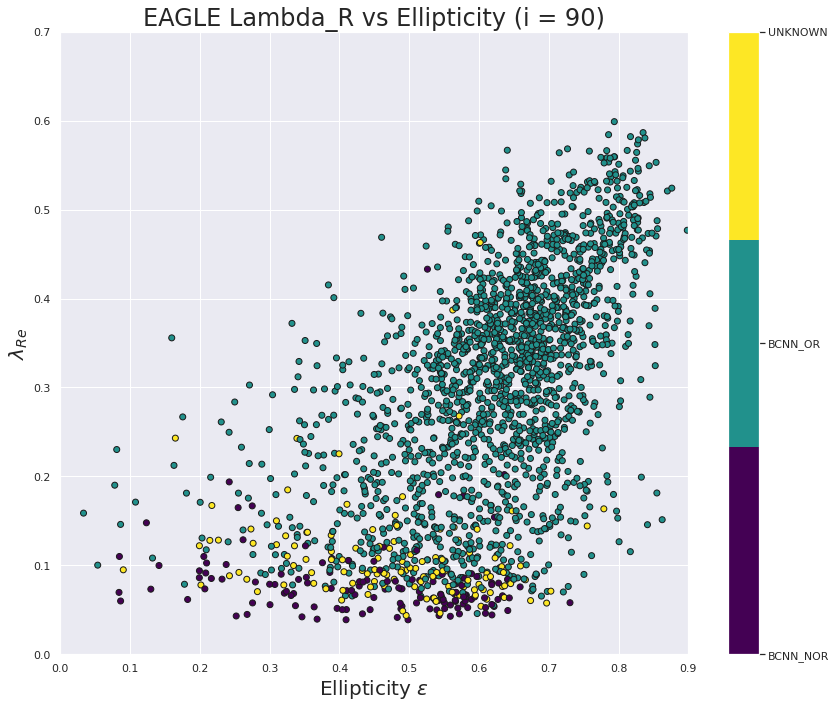

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()
# matplotlib.rc_file_defaults()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_ellip90, eagle_lambdar90, c = eagle_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Ellipticity ' + r'$\varepsilon$' , fontsize = 20)
plt.ylabel(r'$\lambda_{Re}$', fontsize = 20)
plt.title('EAGLE Lambda_R vs Ellipticity (i = 90)', fontsize = 24)
plt.xlim(0, 0.9)
plt.ylim(0, 0.7)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

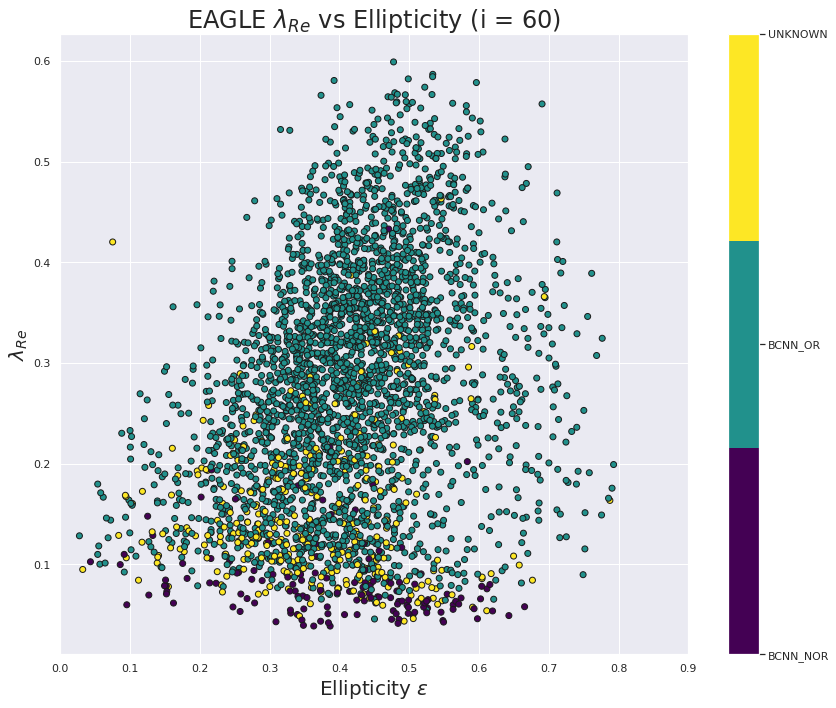

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_ellip60, eagle_lambdar60, c = eagle_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Ellipticity ' + r'$\varepsilon$' , fontsize = 20)
plt.ylabel(r'$\lambda_{Re}$', fontsize = 20)
plt.title('EAGLE $\lambda_{Re}$ vs Ellipticity (i = 60)', fontsize = 24)
plt.xlim(0, 0.9)
# plt.ylim(0, 0.4)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

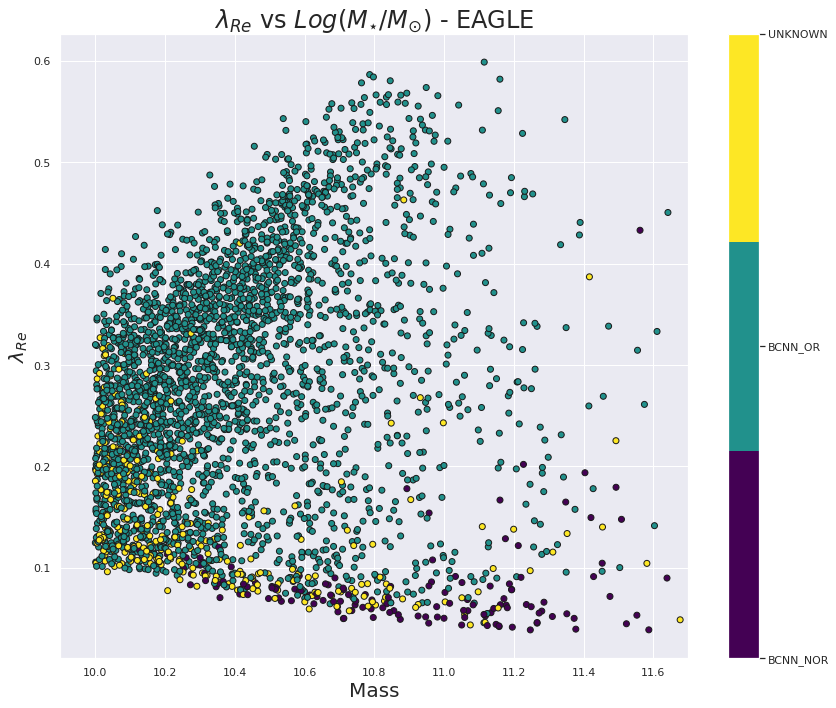

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_lmsol, eagle_lambdar90, c = eagle_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Mass', fontsize = 20)
plt.title('$\lambda_{Re}$ vs $Log(M_{\star}/M_{\odot}$) - EAGLE', fontsize = 24)
plt.ylabel(r'$\lambda_{Re}$', fontsize = 20)

# plt.ylim(0, 0.4)
plt.xlim(9.9, 11.7)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

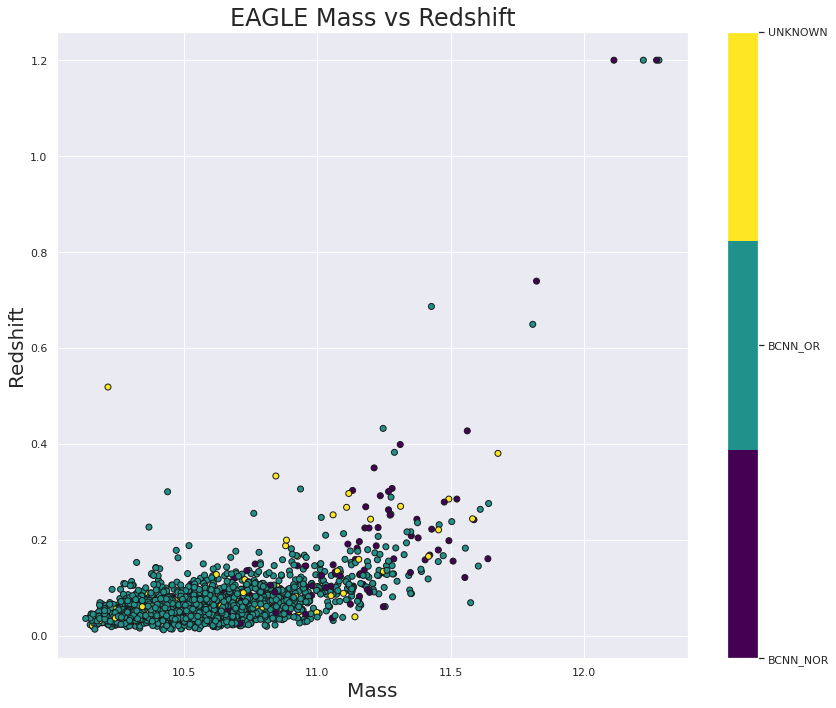

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_lmsol, eagle_z, c = eagle_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Mass', fontsize = 20)
plt.title('EAGLE Mass vs Redshift', fontsize = 24)
plt.ylabel('Redshift', fontsize = 20)

# plt.ylim(0, 0.12)
# plt.xlim(7, 12)
# ax.set_facecolor('xkcd:light grey')


# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

In [ ]:
# cat_test1 = cat
# cat_test1 = cat[np.where(eagle_class == 2)]
# eagle_z2 = cat_test1.field('REDSHIFT')
# cat_test1 = cat_test1[np.where(eagle_z2 < 0.06)]
# eagle_lmsol2 = cat_test1.field('LOG_M_SOL')
# cat_test1 = cat_test1[np.where(eagle_lmsol2 > 10.8)]
# IDS = cat_test1.field("EAGLE_ID")
# IDS = np.array(IDS)
# IDS

In [ ]:
# cat_test2 = cat
# cat_test2 = cat[np.where(eagle_class == 1)]
# eagle_z2 = cat_test2.field('REDSHIFT')
# cat_test2 = cat_test2[np.where(eagle_z2 < 0.06)]
# eagle_lmsol2 = cat_test2.field('LOG_M_SOL')
# cat_test2 = cat_test2[np.where(eagle_lmsol2 > 10.8)]
# IDS2 = cat_test2.field("EAGLE_ID")
# IDS2 = np.array(IDS2)
# IDS2

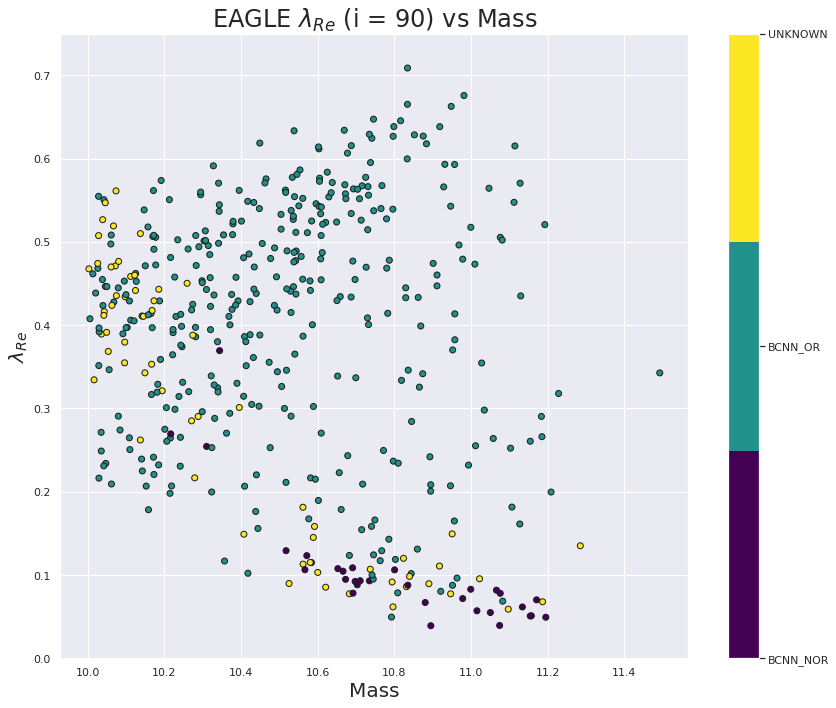

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(eagle_lmsol, eagle_lambdar90, c = eagle_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Mass', fontsize = 20)
plt.title('EAGLE $\lambda_{Re}$ (i = 90) vs Mass', fontsize = 24)
plt.ylabel(r'$\lambda_{Re}$', fontsize = 20)

plt.ylim(0, 0.75)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')
# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

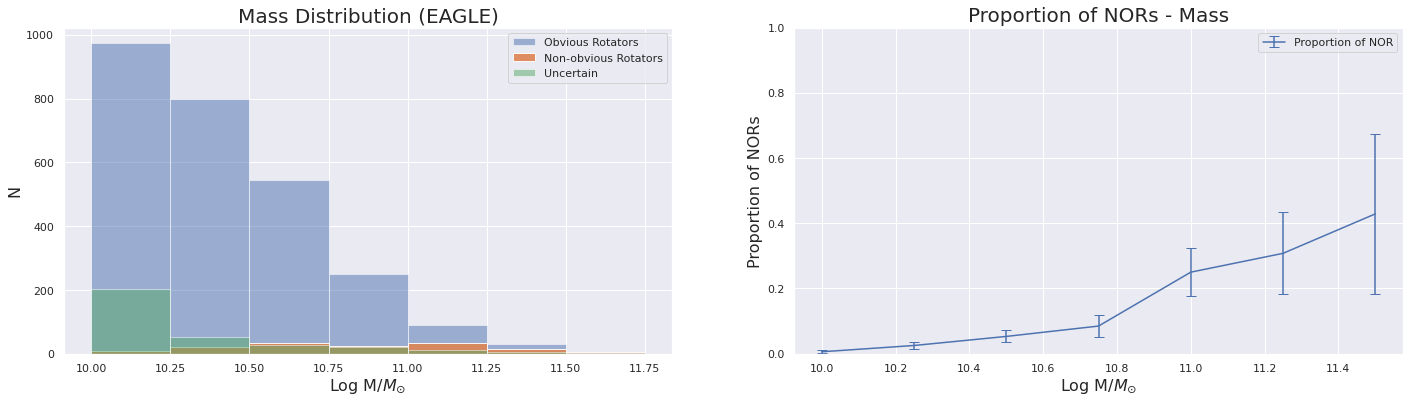

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (24,6))
bins = np.arange(10.0, 12, 0.25)
counts, bins, bars = axs[0].hist(eagle_m_sol_OR, alpha = 0.5, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_m_sol_NOR, alpha = 0.9, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_m_sol_UNKNOWN, alpha = 0.5, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Mass Distribution (EAGLE)', fontsize = 20)
axs[0].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts2[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of NOR')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

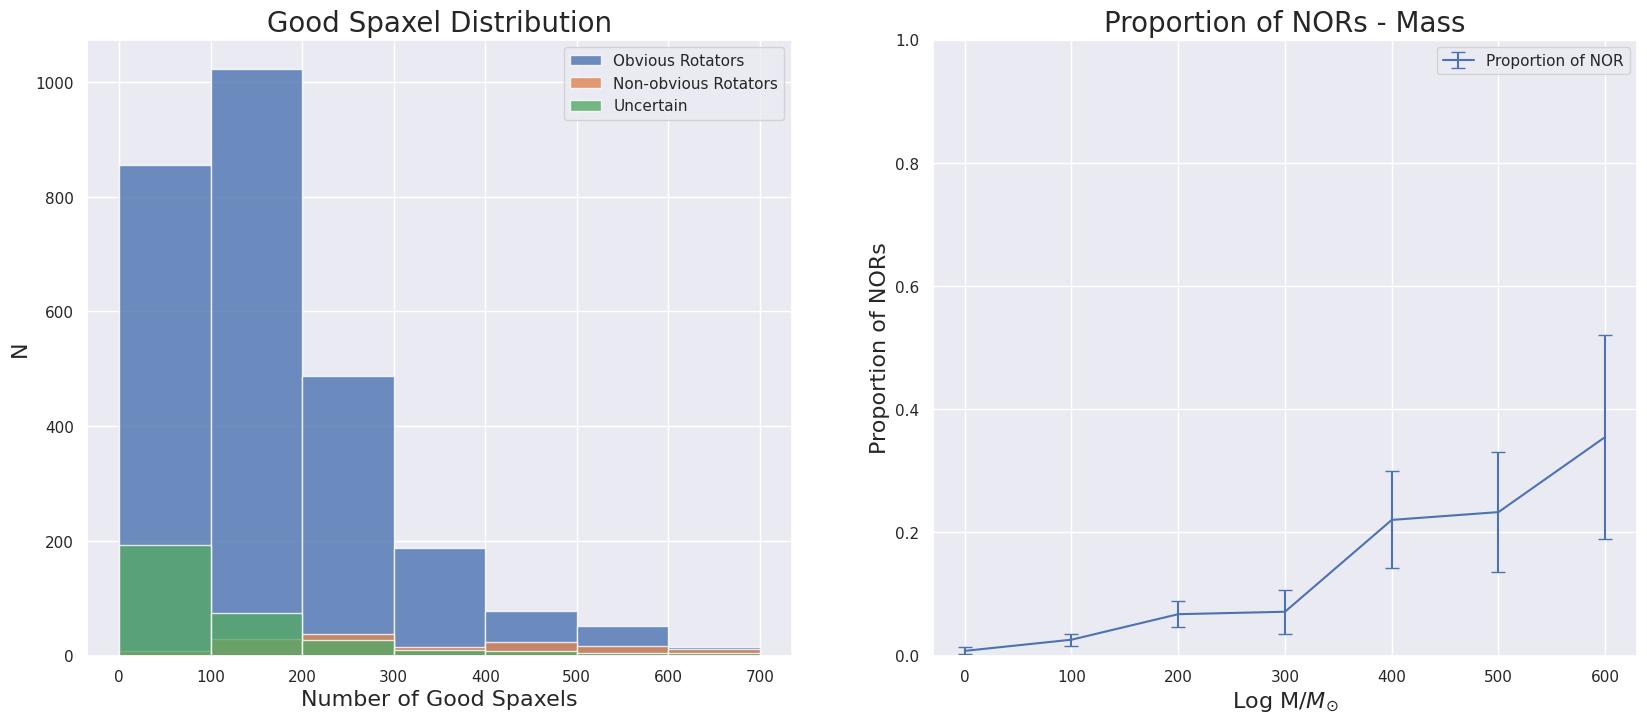

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (20,8))
bins = np.arange(0, 800, 100)
counts, bins, bars = axs[0].hist(eagle_spaxels_OR, alpha = 0.8, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_spaxels_NOR, alpha = 0.8, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_spaxels_UNKNOWN, alpha = 0.8, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Good Spaxel Distribution', fontsize = 20)
axs[0].set_xlabel('Number of Good Spaxels', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts2[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of NOR')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

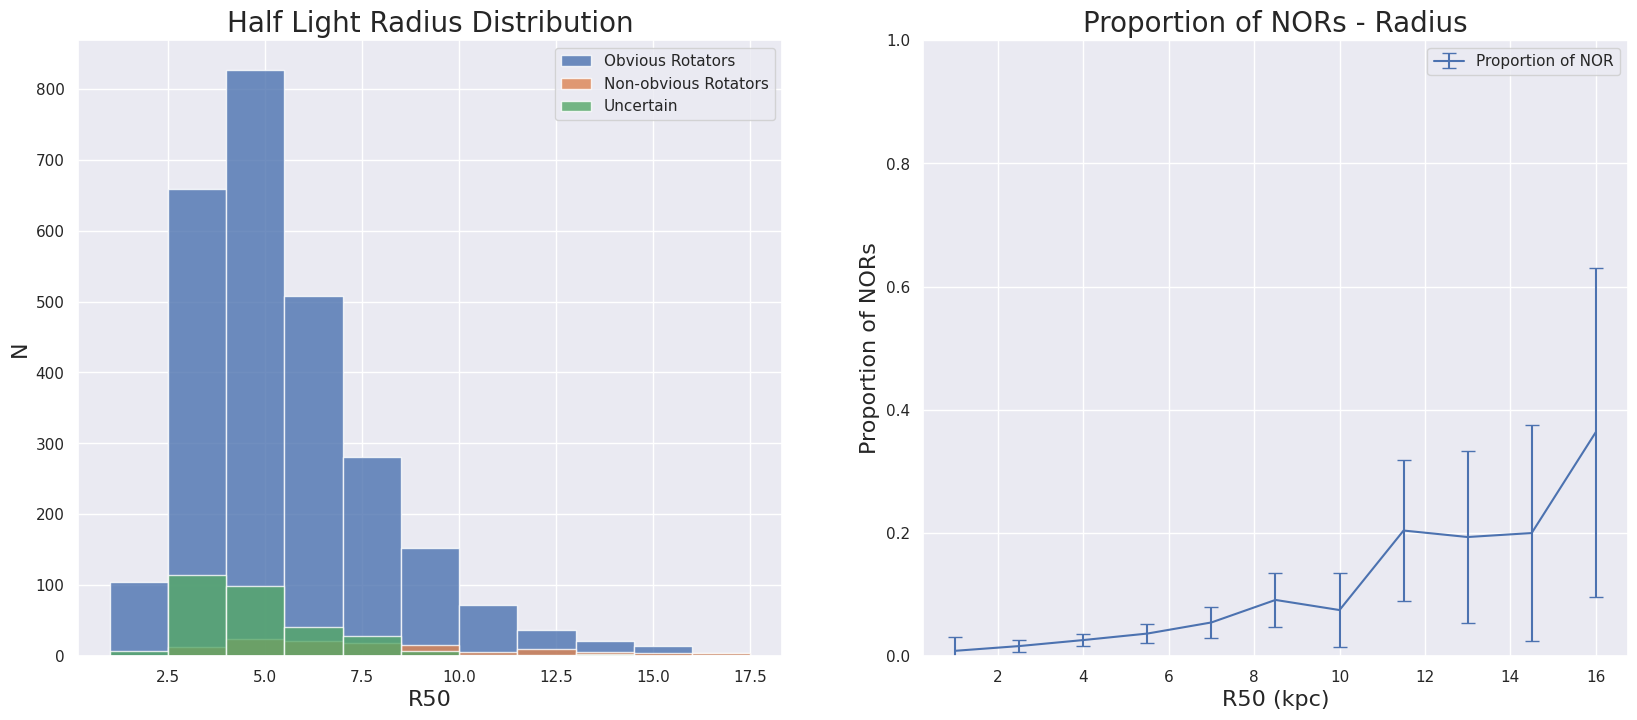

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (20,8))
bins = np.arange(1, 19, 1.5)
counts, bins, bars = axs[0].hist(eagle_r50_OR, alpha = 0.8, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_r50_NOR, alpha = 0.8, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_r50_UNKNOWN, alpha = 0.8, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Half Light Radius Distribution', fontsize = 20)
axs[0].set_xlabel('R50', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts2[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of NOR')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Radius', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('R50 (kpc)', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

In [ ]:
np.nanmin(eagle_r50)

1.2239408

In [ ]:
np.nanmax(eagle_r50)

206.15506

In [ ]:
cat_test = cat
cat_test = cat_test[np.where(cat_test.field('LOG_M_SOL') > 11.5)]

In [ ]:
guess_1 = np.array(cat_test.field('EAGLE_ID'))

In [ ]:
guess_1

array([b'13965936', b'14916079', b'15710021', b'16300531', b'18481114',
       b'18544428', b'18601016', b'18644986', b'18781589', b'18927202',
       b'19151261', b'19250447', b'19291687', b'19354332', b'19595681',
       b'19615774', b'21379521', b'21573586', b'21730535', b'21986361'],
      dtype='|S8')

In [ ]:
guess_2 = np.zeros((np.shape(guess_1)))
guess_3 = []
for i in range(0, np.size(guess_1)):
  guess = int(int(guess_1[i]))
  guess_3.append(guess)
  # print(guess)
  guess_2[i] = int(guess)

guess_3 = np.array(guess_3)


In [ ]:
guess_3

array([13965936, 14916079, 15710021, 16300531, 18481114, 18544428,
       18601016, 18644986, 18781589, 18927202, 19151261, 19250447,
       19291687, 19354332, 19595681, 19615774, 21379521, 21573586,
       21730535, 21986361])

In [ ]:
guess_2[0]

13965936.0

In [ ]:
eagle_class_test = cat_test.field('CNN_CLASS')
eagle_OR_test = cat_test.field('CNN_OR_PROB')
eagle_NOR_test = cat_test.field('CNN_NOR_PROB')
eagle_ID_test = cat_test.field('EAGLE_ID')
eagle_lmsol_test = cat_test.field('LOG_M_SOL')
eagle_lmsol50_test = cat_test.field('LOG_M_SOL50')
eagle_r50_test = cat_test.field('R_50')
eagle_r50_proj_test = cat_test.field('R50_PROJ')
eagle_re_r_test = cat_test.field('RE_RBAND')
eagle_z_test = cat_test.field('REDSHIFT')
eagle_numspaxel_test = cat_test.field('NUM_SPAXEL')
eagle_ellip60_test = cat_test.field('ELLIP_i60')
eagle_lambdar60_test = cat_test.field('LAMBDA_i60')
eagle_ellip90_test = cat_test.field('ELLIP_i90')
eagle_lambdar90_test = cat_test.field('LAMBDA_i90')

In [ ]:

# labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
# sns.set_theme()

# fig, ax = plt.subplots(figsize = (12, 10))
# plt.scatter(eagle_lmsol_test, eagle_lambdar60_test, c = eagle_class_test, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
# plt.xlabel('Mass', fontsize = 20)
# plt.title('EAGLE $\lambda_{Re}$ (i = 60) vs Mass', fontsize = 24)
# plt.ylabel(r'$\lambda_{Re}$', fontsize = 20)

# plt.ylim(0, 0.75)
# plt.xlim(10, 11.4)
# # ax.set_facecolor('xkcd:light grey')


# # This function formatter will replace integers with target names
# formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# # We must be sure to specify the ticks matching our target names
# plt.colorbar(ticks=[0, 1, 2], format=formatter);
# plt.tight_layout()
# plt.show()

In [ ]:
# eagle_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_180821.npy')
# eagle_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_sig_180821.npy')
# eagle_ID_string = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_ID_180821.npy')

# eagle_IDs = []
# for i in range(0, np.size(eagle_ID_string)):
#   eagle_ID_NEW = int(eagle_ID_string[i])
#   eagle_IDs.append(eagle_ID_NEW)

# eagle_IDs = np.array(eagle_IDs)

# eagle_maps = np.concatenate((eagle_vel, eagle_sig), axis = 3)

In [ ]:
# eagle_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_070921.npy')
# eagle_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_sig_070921.npy')
# eagle_ID_string = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_ID_070921.npy')

# eagle_IDs = []
# for i in range(0, np.size(eagle_ID_string)):
#   eagle_ID_NEW = int(eagle_ID_string[i])
#   eagle_IDs.append(eagle_ID_NEW)

# eagle_IDs = np.array(eagle_IDs)

# eagle_maps = np.concatenate((eagle_vel, eagle_sig), axis = 3)

In [ ]:
eagle_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_0510.npy')
eagle_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_sig_0510.npy')
eagle_IDss = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_ID_0510.npy')

eagle_sigscale = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/EAGLE_vel_sigscale_0510.npy')

eagle_IDs = []
for i in eagle_IDss:
  eagle_IDs.append(int(i))

eagle_IDs = np.array(eagle_IDs)

eagle_maps = np.concatenate((eagle_vel, eagle_sig, eagle_sigscale), axis = 3)
# eagle_maps = np.concatenate((eagle_vel, eagle_sig), axis = 3)

In [ ]:
np.size(eagle_IDs)

3164

In [ ]:
np.shape(eagle_maps)

(1581, 50, 50, 2)

In [ ]:
guess_3

array([13965936, 14916079, 15710021, 16300531, 18481114, 18544428,
       18601016, 18644986, 18781589, 18927202, 19151261, 19250447,
       19291687, 19354332, 19595681, 19615774, 21379521, 21573586,
       21730535, 21986361])

In [ ]:
ida = cat.field("EAGLE_ID")

In [ ]:
# eagle_ID_OR = [14978115, 17891603, 18719249, 18996096, 19104572, 19402355,
#        19556663, 20025451, 20278392, 20324216]

# eagle_ID_NOR = [18849992, 19299050, 19331309, 20069906]

eagle_ID_UNK = [10858965, 10931856,  9278205,  9885454,  9896726]

eagle_ID_OR = [14151096, 15465662, 16036383, 16504438]

eagle_ID_NOR = [10029006, 10180875, 10431233, 14632180]

eagle_ID_UNK2 = [10639641,14967952,15151455,15494457,15829793,16727953,9498012]

eagle_ID_UNK3 = [14195765, 14967952, 15393778, 15494457, 16376964, 16385870, 17891603,  8058402,  9498012]

eagle_ID_OR2 = [10632940, 13202230, 13935854, 13945981, 13954079, 13995967,
       14151096, 14202037, 14281806, 14308491, 14510386, 14552942,
       14632180, 14737384, 14837488, 14961744, 15076081, 15106378,
       15134528, 15189923, 15233502, 15445483, 15511663, 15620685,
       15635732, 15745722, 15885742, 16085014, 16238797, 16262527,
       16275865, 16373727, 16382117, 16416251, 16437977, 16454619,
       16494872, 16517496, 16521445, 16555698, 16753620, 16841705,
       16943854, 16978214, 16991086, 17054447, 17109599, 17128461,
       17189708, 17213205, 17280530, 17454774, 17458111, 17596949,
       18230283, 18240264, 19402355, 19975481, 20025451, 20278392,
       20324216, 20683856,  8071905]

eagle_ID_NOR2 = [8617277, 8883148, 9753782, 9498012]

guess_33 = [13965936, 14916079, 15710021, 16300531, 18481114, 18544428,
       18601016, 18644986, 18781589, 18927202, 19151261, 19250447,
       19291687, 19354332, 19595681, 19615774, 21379521, 21573586,
       21730535, 21986361]


In [ ]:
# guess_3

array([13965936, 14916079, 15710021, 16300531, 18481114, 18544428,
       18601016, 18644986, 18781589, 18927202, 19151261, 19250447,
       19291687, 19354332, 19595681, 19615774, 21379521, 21573586,
       21730535, 21986361])

In [ ]:
np.size(lowspax)

20

In [ ]:
np.size(eagle_ID)

3164

In [ ]:
eagle_ID2 = []
for i in range(0,np.size(eagle_ID)):
  eagle = eagle_ID[i]
  eagle = int(eagle)
  eagle_ID2.append(eagle)

eagle_ID2 = np.array(eagle_ID2)

In [ ]:
catid

13965936

In [ ]:
eagle_ID2

array([10001175, 10003929, 10005161, ...,  9996951,  9998415,  9999649])

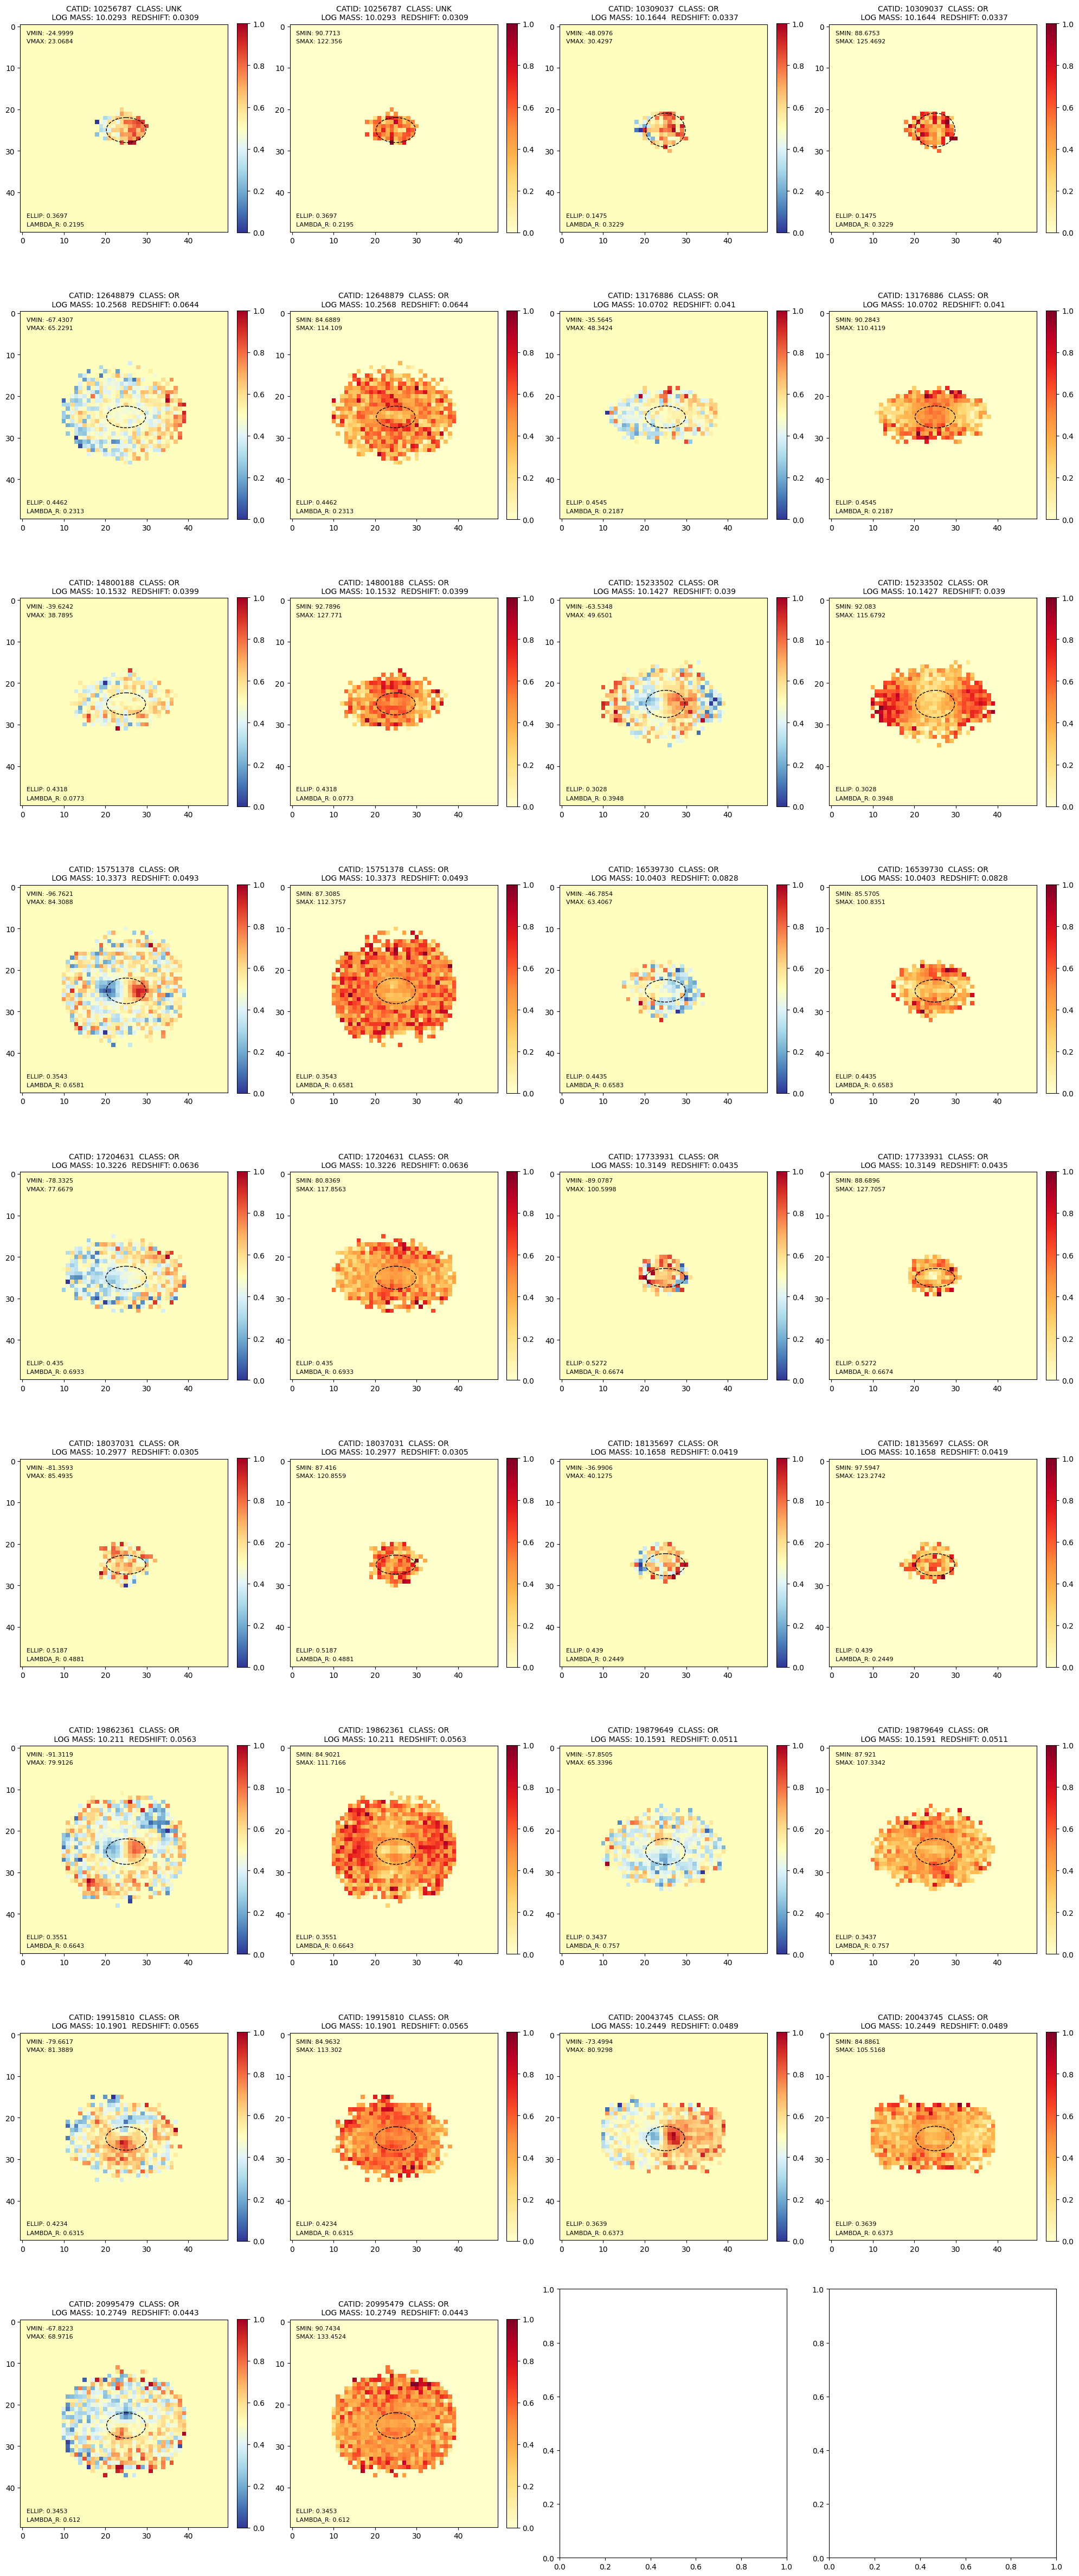

In [ ]:
matplotlib.rc_file_defaults()

catids_use = eagle_ID_OR2[0:20]
x = np.size(catids_use)
x4 = int(np.floor(x/2))
classes = ['NOR', 'OR', 'UNK']
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

if x%2 == 0:
  fig, axs = plt.subplots(x4, 4, figsize = (20, 40))
else:
  fig, axs = plt.subplots(x4+1, 4, figsize = (20, 48))

for i in range(0,x):
  catid = catids_use[i]
  # print(catid)
  idx = np.where(eagle_IDs == catid)[0][0]
  velmap = eagle_maps[idx, :, :, 0]
  sigmap = eagle_maps[idx, :, :, 1]
  # vmin1 = vmin[i]
  idx2 = np.where(eagle_ID2 == catid)[0][0]
  mass = np.round(eagle_lmsol[idx2], 4)
  lambda_r = np.round(eagle_lambdar60[idx2], 4)
  ellip = np.round(eagle_ellip60[idx2], 4)
  # vmin1 = np.round(eagle_minvel[idx2], 4)
  # vmax1 = np.round(eagle_maxvel[idx2], 4)
  # smin1 = np.round(eagle_minsig[idx2], 4)
  # smax1 = np.round(eagle_maxsig[idx2], 4)
  red1 = np.round(eagle_z[idx2], 4)
  eclass1 = classes[eagle_class[idx2]]
 
  ang = eagle_ang[idx2]
  radius = eagle_r50[idx2]
  radhi = eagle_radhi[idx2]
  a1 = (radius*2)/ang
  b1 = -1*(ellip - 1)*a1

  if i%2 == 0:
    ii = int(i/2)
    a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
    axs[ii, 0].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    # # axs[ii, 0].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    # axs[ii, 0].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    # axs[ii, 0].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 0].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 0].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))


    b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
    fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
    axs[ii, 1].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    # axs[ii, 1].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    # axs[ii, 1].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    axs[ii, 1].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 1].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 1].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))
  
  else:
    ii = int((i-1)/2)
    a = axs[ii, 2].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
    axs[ii, 2].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    # # axs[ii, 2].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    # axs[ii, 2].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    # axs[ii, 2].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 2].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 2].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

    b = axs[ii, 3].imshow(sigmap, cmap='YlOrRd')
    axs[ii, 3].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    fig.colorbar(b, ax=axs[ii, 3], fraction=0.046, pad=0.04)
    # axs[ii, 3].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    # axs[ii, 3].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    # axs[ii, 3].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 3].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 3].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

plt.tight_layout()
plt.show()

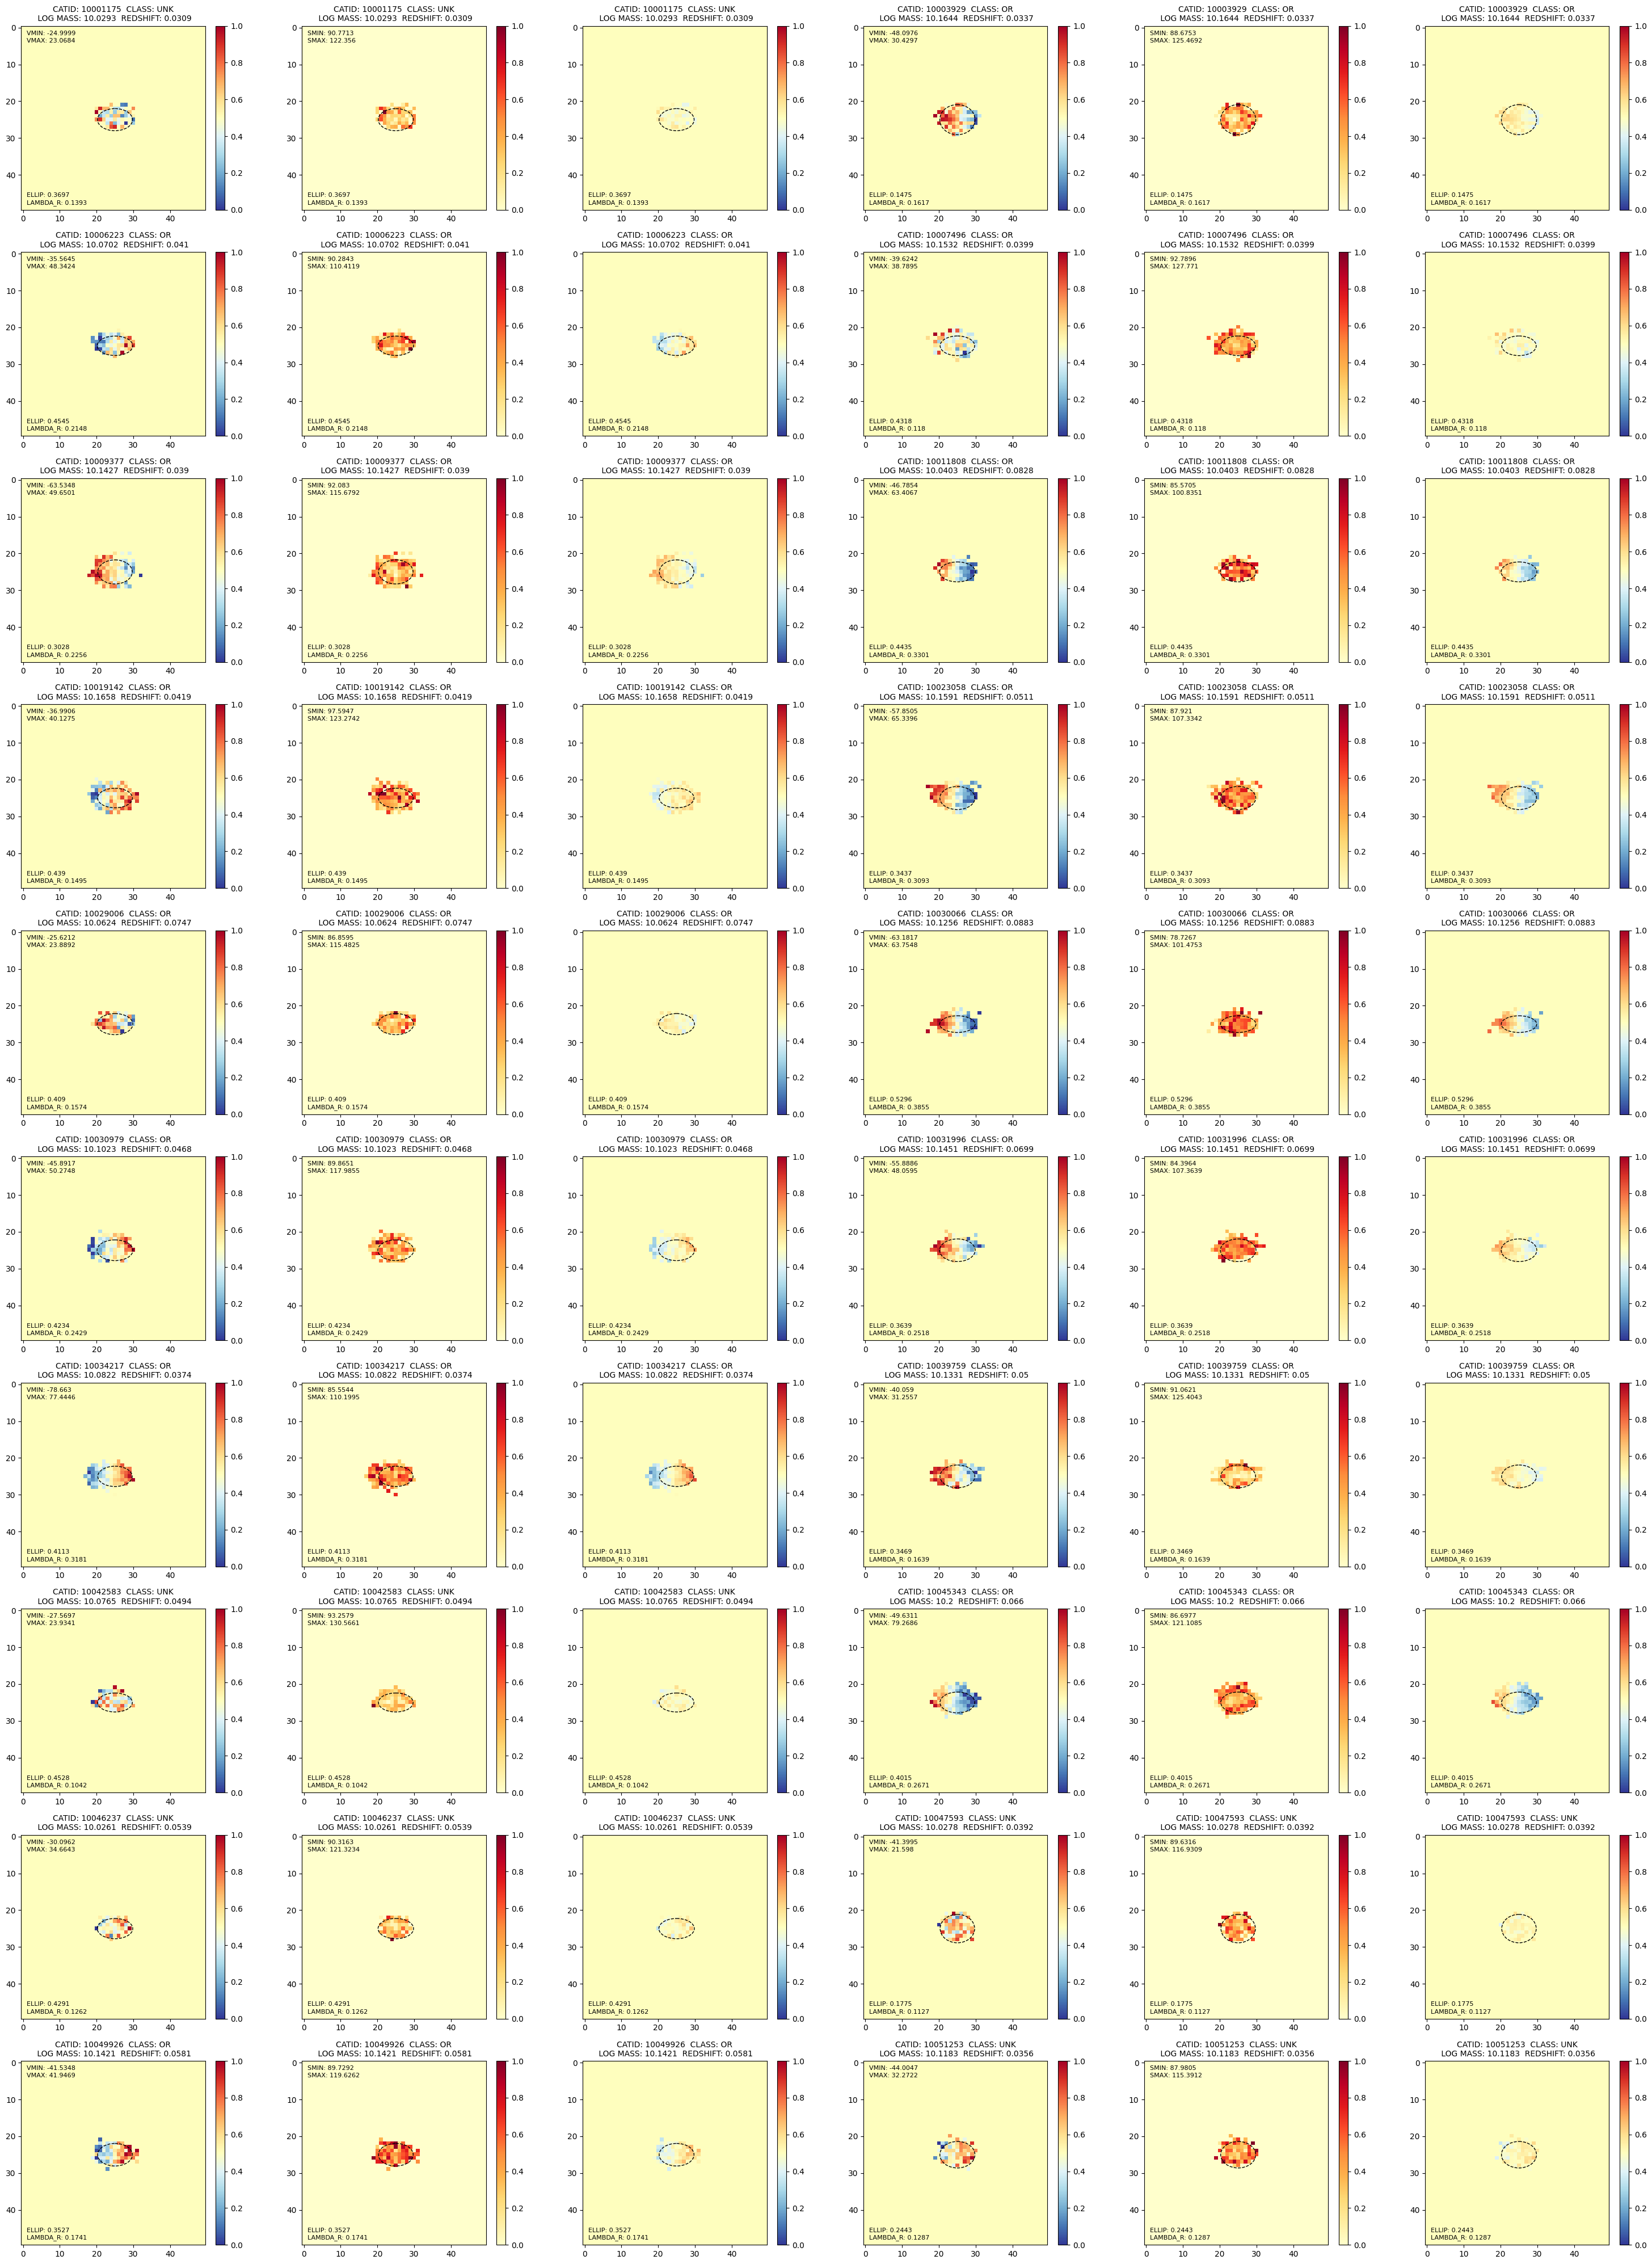

In [ ]:
matplotlib.rc_file_defaults()

catids_use = lowspax
x = np.size(catids_use)
x4 = int(np.floor(x/2))
classes = ['NOR', 'OR', 'UNK']
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

if x%2 == 0:
  fig, axs = plt.subplots(x4, 6, figsize = (30, 40))
else:
  fig, axs = plt.subplots(x4+1, 6, figsize = (20, 48))

for i in range(0,x):
  catid = catids_use[i]
  # print(catid)
  idx = np.where(eagle_IDs == catid)[0][0]
  velmap = eagle_maps[idx, :, :, 0]
  sigmap = eagle_maps[idx, :, :, 1]
  velscalemap = eagle_maps[idx, :, :, 2]
  vmin1 = vmin[i]
  idx2 = np.where(eagle_ID2 == catid)[0][0]
  mass = np.round(eagle_lmsol[idx2], 4)
  lambda_r = np.round(eagle_lambdar60[idx2], 4)
  ellip = np.round(eagle_ellip60[idx2], 4)
  vmin1 = np.round(eagle_minvel[idx2], 4)
  vmax1 = np.round(eagle_maxvel[idx2], 4)
  smin1 = np.round(eagle_minsig[idx2], 4)
  smax1 = np.round(eagle_maxsig[idx2], 4)
  red1 = np.round(eagle_z[idx2], 4)
  eclass1 = classes[eagle_class[idx2]]
 
  ang = eagle_ang[idx2]
  radius = eagle_r50[idx2]
  radhi = eagle_radhi[idx2]
  a1 = (radius*2)/ang
  b1 = -1*(ellip - 1)*a1

  ratio = vmax1/(0.95*smax1)

  if i%2 == 0:
    ii = int(i/2)
    a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
    axs[ii, 0].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    axs[ii, 0].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    axs[ii, 0].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    axs[ii, 0].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 0].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 0].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))


    b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
    fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
    axs[ii, 1].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    axs[ii, 1].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    axs[ii, 1].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    axs[ii, 1].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 1].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 1].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

    c = axs[ii, 2].imshow(velscalemap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
    axs[ii, 2].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    # axs[ii, 2].text(1,2,'RATIO: ' + str(vmin1), fontsize = 8)
    # axs[ii, 2].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    axs[ii, 2].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 2].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 2].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))
  
  else:
    ii = int((i-1)/2)
    a = axs[ii, 3].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 3], fraction=0.046, pad=0.04)
    axs[ii, 3].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    axs[ii, 3].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    axs[ii, 3].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    axs[ii, 3].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 3].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 3].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

    b = axs[ii, 4].imshow(sigmap, cmap='YlOrRd')
    axs[ii, 4].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    fig.colorbar(b, ax=axs[ii, 4], fraction=0.046, pad=0.04)
    axs[ii, 4].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    axs[ii, 4].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    axs[ii, 4].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 4].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 4].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

    c = axs[ii, 5].imshow(velscalemap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 5], fraction=0.046, pad=0.04)
    axs[ii, 5].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass) + '  REDSHIFT: ' + str(red1), fontsize = 10)
    # axs[ii, 5].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    # axs[ii, 5].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    axs[ii, 5].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    axs[ii, 5].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    axs[ii, 5].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

plt.tight_layout()
plt.show()

In [ ]:
eagle_ID

<Column name='EAGLE_ID' dtype='str8' length=1581>
10005161
10006223
10011808
10014008
10016770
10019142
10021712
10023058
10025603
10026631
10027820
10029006
     ...
 9974450
 9976061
 9977299
 9978451
 9979896
 9985401
 9986361
 9987252
 9991034
 9992055
 9993167
 9996951

In [ ]:
catid

14510386

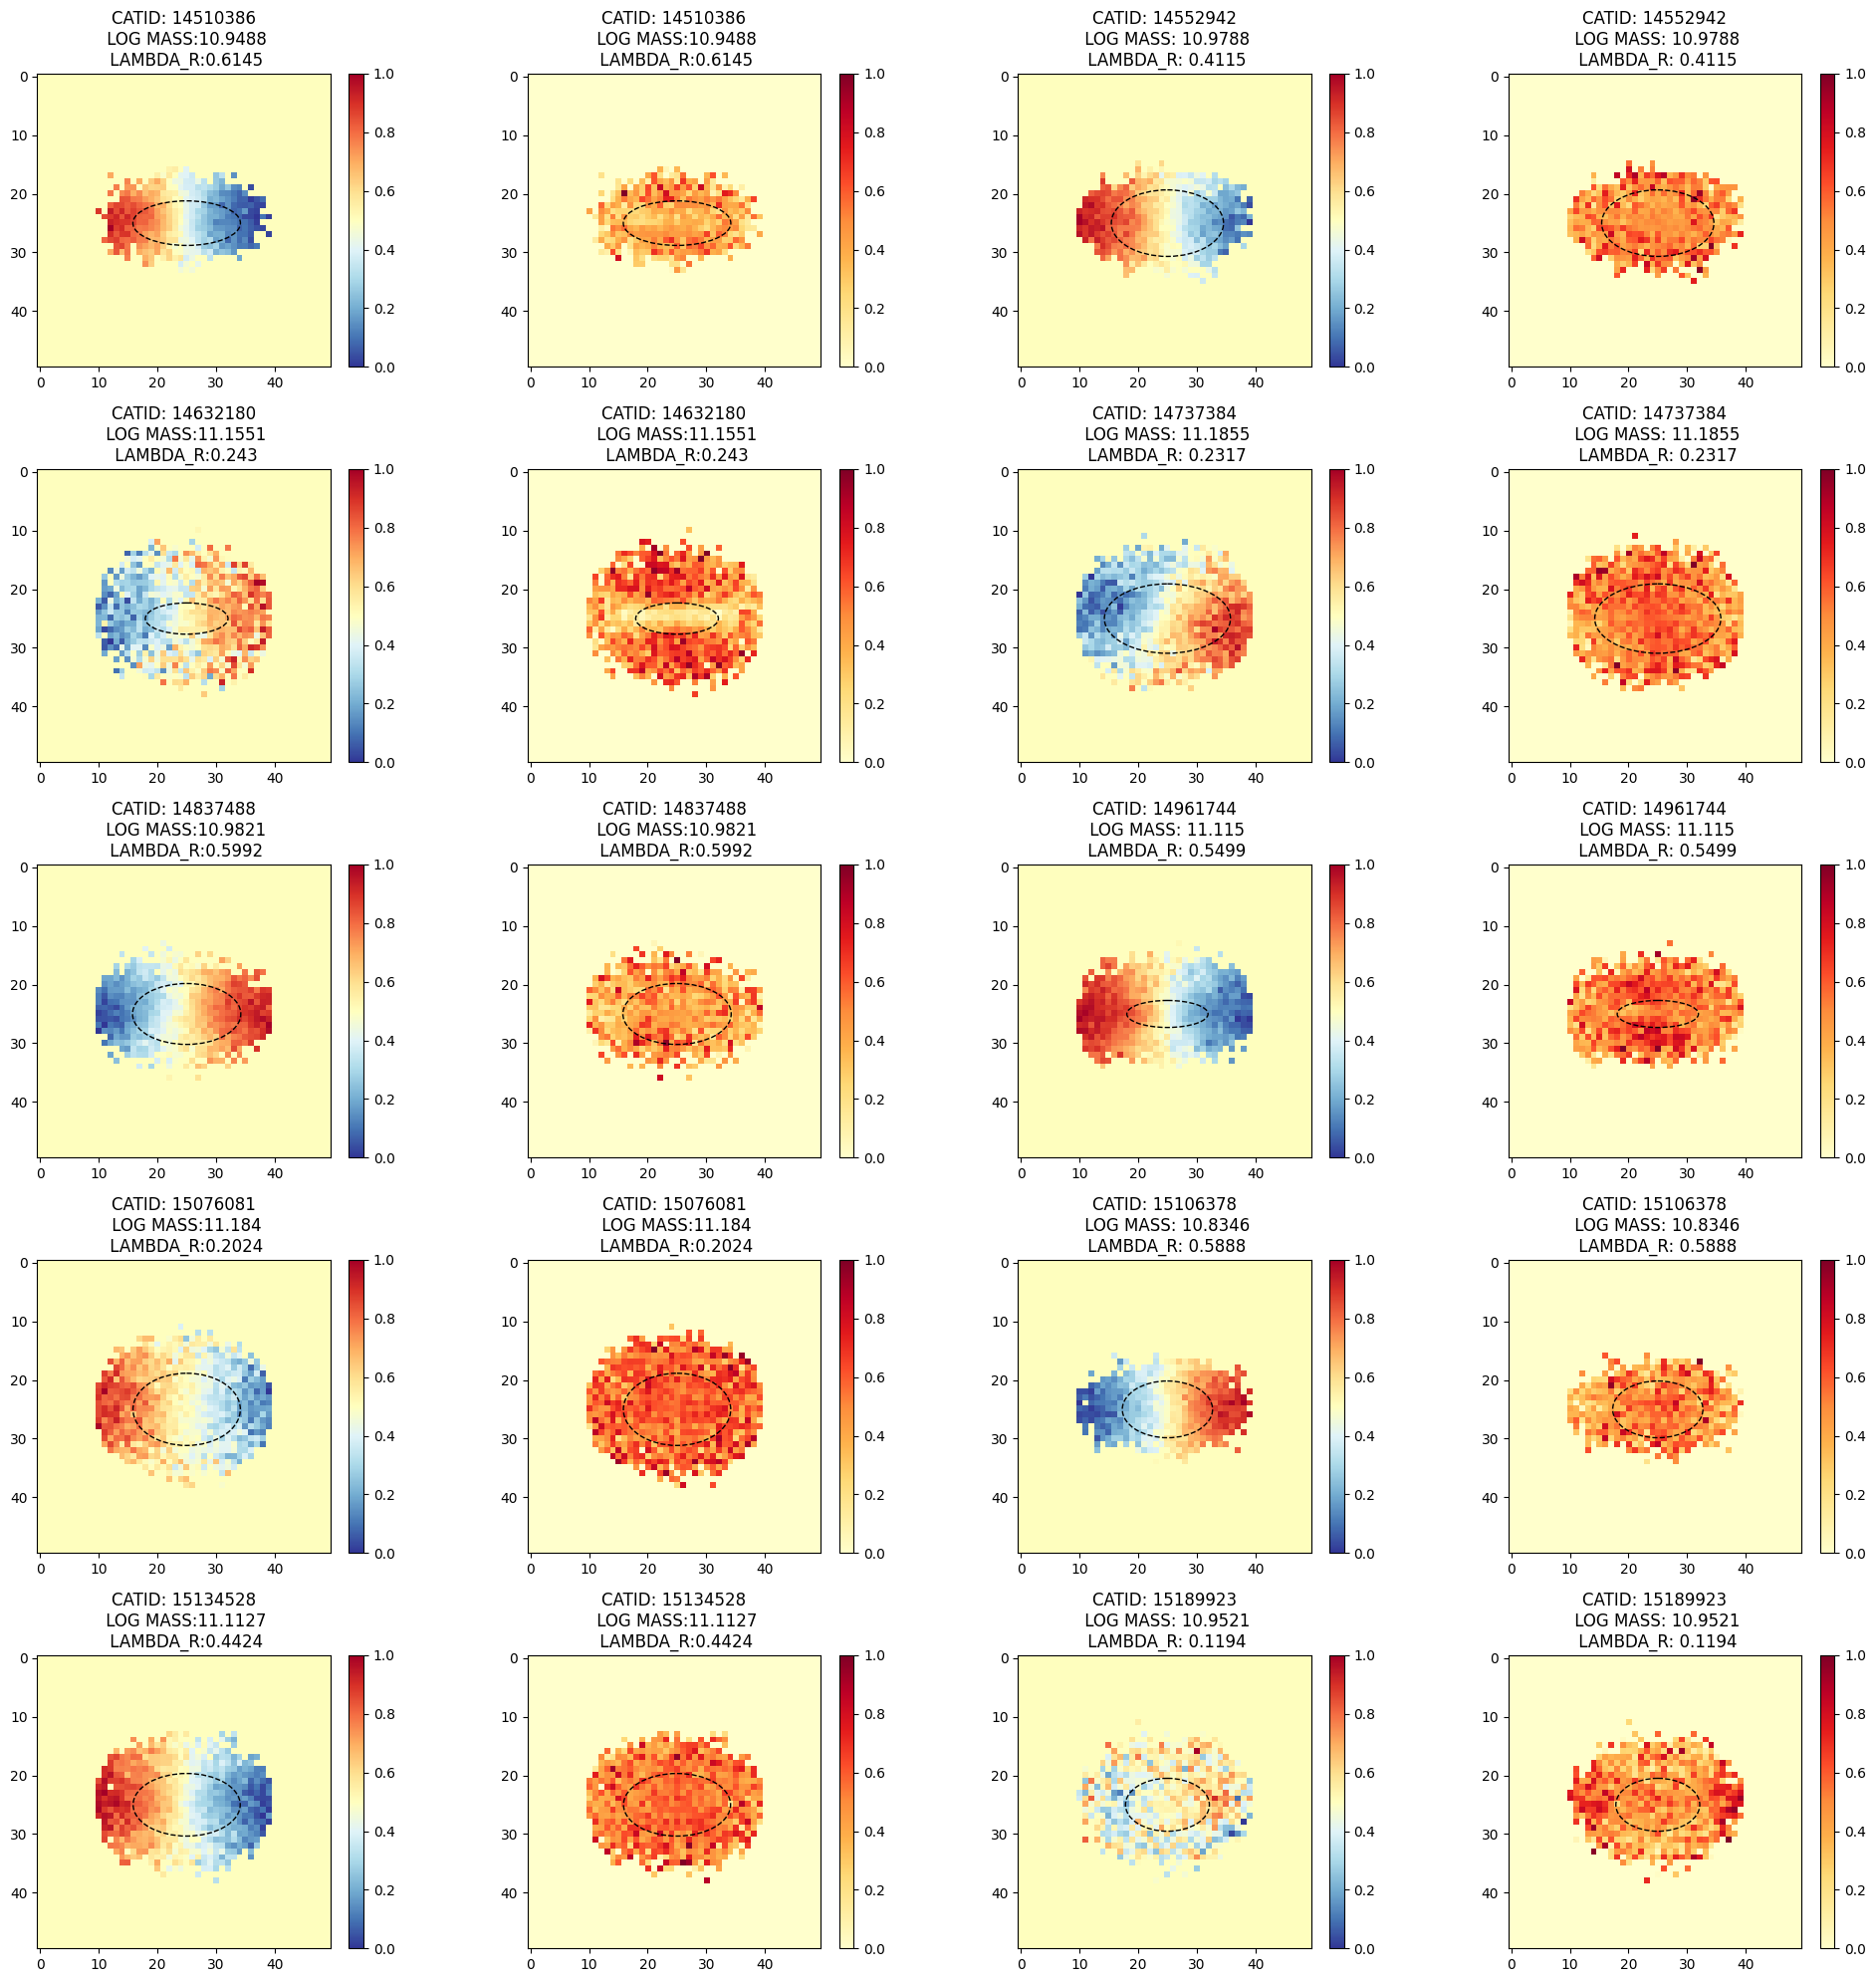

In [ ]:
matplotlib.rc_file_defaults()

catids_use = eagle_ID_OR2[10:20]
x = np.size(catids_use)
x4 = int(np.floor(x/2))
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

if x%2 == 0:
  fig, axs = plt.subplots(x4, 4, figsize = (20, 20))
else:
  fig, axs = plt.subplots(x4+1, 4, figsize = (20, 20))

for i in range(0,x):
  catid = catids_use[i]
  idx = np.where(eagle_IDs == catid)[0][0]
  velmap = eagle_maps[idx, :, :, 0]
  sigmap = eagle_maps[idx, :, :, 1]

  idx2 = np.where(eagle_ID == catid)[0][0]
  mass = np.round(eagle_lmsol[idx2], 4)
  lambda_r = np.round(eagle_lambdar60[idx2], 4)

  if i%2 == 0:
    ii = int(i/2)
    # print(ii)
    a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    # axs[ii, 0].patches.Ellipse((0,0), a, b, ls = '--')
    fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
    axs[ii, 0].set_title('CATID: ' + str(catid) + '\n LOG MASS:' + str(mass) + '\n LAMBDA_R:' + str(lambda_r))

    b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
    fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
    axs[ii, 1].set_title('CATID: ' + str(catid) + '\n LOG MASS:' + str(mass) + '\n LAMBDA_R:' + str(lambda_r))

    idx2 = np.where(eagle_ID == catid)[0][0]
    ellip = eagle_ellip60[idx2]
    radius = eagle_r50[idx2]
    a = radius
    b = -1*(ellip - 1)*a
    a = 2*a
    b = 2*b

    axs[ii, 0].add_patch(matplotlib.patches.Ellipse((25, 25), a,b, ls = '--', fill=False))
    axs[ii, 1].add_patch(matplotlib.patches.Ellipse((25, 25), a,b, ls = '--', fill=False))
  
  else:
    ii = int((i-1)/2)
    # print(ii)
    a = axs[ii, 2].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
    axs[ii, 2].set_title('CATID: ' + str(catid) + '\n LOG MASS: ' + str(mass) + '\n LAMBDA_R: ' + str(lambda_r))

    b = axs[ii, 3].imshow(sigmap, cmap='YlOrRd')
    axs[ii, 3].set_title('CATID: ' + str(catid) + '\n LOG MASS: ' + str(mass) + '\n LAMBDA_R: ' + str(lambda_r))
    fig.colorbar(b, ax=axs[ii, 3], fraction=0.046, pad=0.04)

    idx2 = np.where(eagle_ID == catid)[0][0]
    ellip = eagle_ellip60[idx2]
    radius = eagle_r50[idx2]
    a = radius
    b = -1*(ellip - 1)*a
    a = 2*a
    b = 2*b
    ellipse = Ellipse((25,25),a, b, ls = '--', fill = False)
    # axs.set_xlim(0, 50)
    # axs.set_ylim(0, 50)
    axs[ii, 2].add_patch(matplotlib.patches.Ellipse((25, 25), a,b, ls = '--', fill=False))
    axs[ii, 3].add_patch(matplotlib.patches.Ellipse((25, 25), a,b, ls = '--', fill=False))

plt.tight_layout()
plt.show()

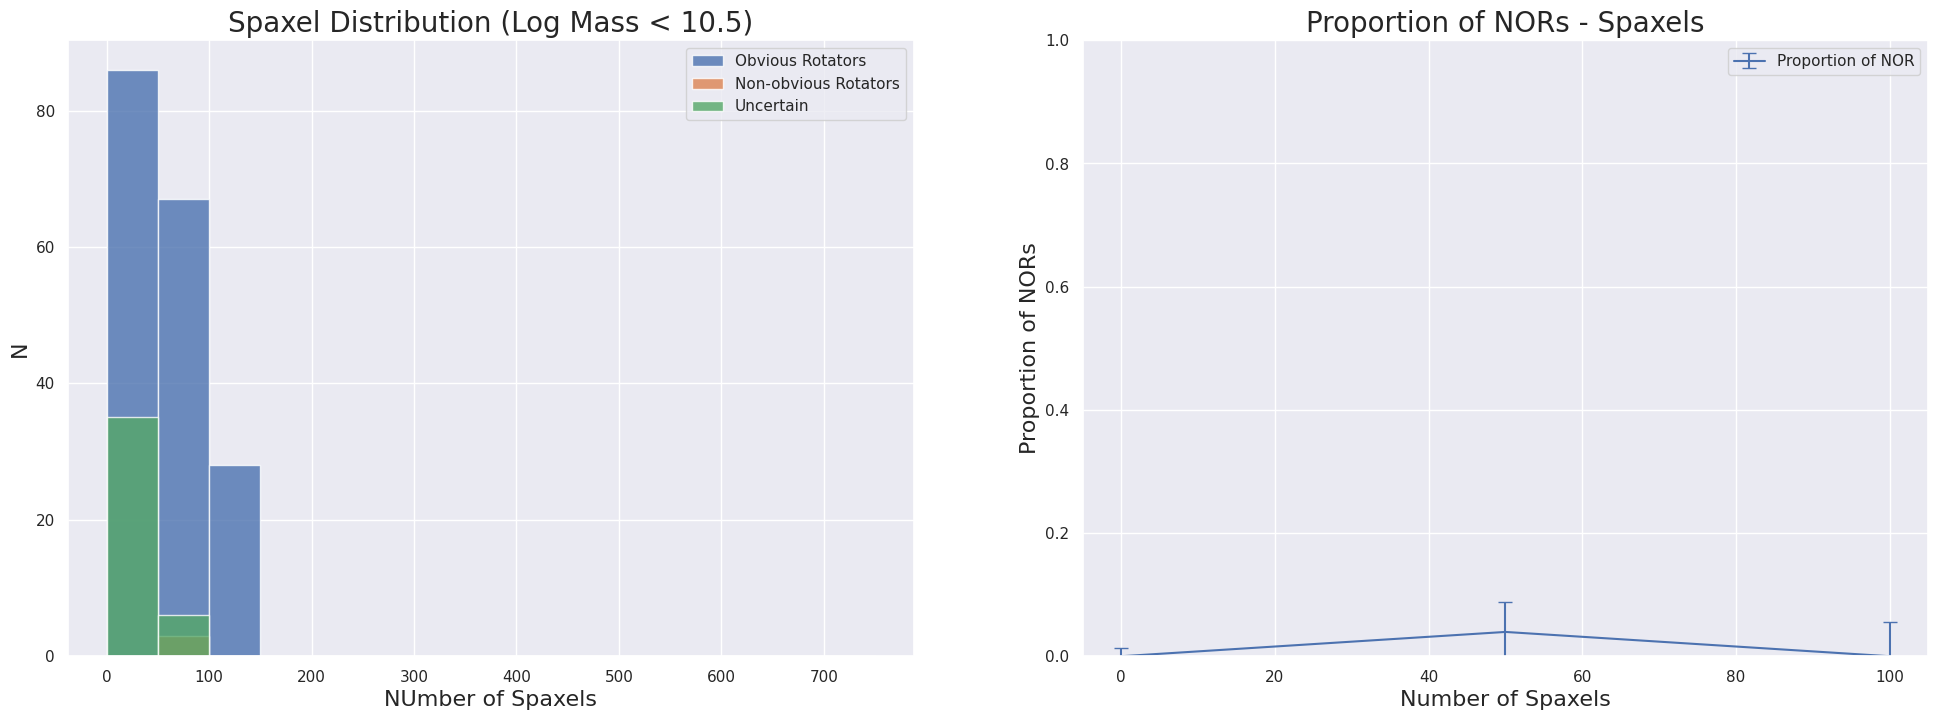

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (24,8))
bins = np.arange(0, 800, 50)
counts, bins, bars = axs[0].hist(eagle_spaxels_OR, alpha = 0.8, bins = bins,  label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(eagle_spaxels_NOR, alpha = 0.8, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(eagle_spaxels_UNKNOWN, alpha = 0.8, bins = bins, label = 'Uncertain')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts2[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

axs[0].legend()
axs[0].set_title('Spaxel Distribution (Log Mass < 10.5)', fontsize = 20)
axs[0].set_xlabel('NUmber of Spaxels', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of NOR')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Spaxels', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Number of Spaxels', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()